In [4]:
import FinanceDataReader as fdr
import pandas as pd
import mplfinance as mpf
import numpy as np

In [5]:
kospi_200 = pd.read_csv('kospi200.csv', encoding='EUC-KR')
kospi = pd.DataFrame(kospi_200)
kospi_dict = {}

# 코스피 200 종목코드, 종목명 딕셔너리 생성
for index, row in kospi.iterrows():
    code = str(row['종목코드'])
    length = len(code)
    if length < 6:
         for _ in range (6-length):
             code = '0' + code
    kospi_dict[code] = row['종목명']
print(kospi_dict)

{'005930': '삼성전자', '373220': 'LG에너지솔루션', '000660': 'SK하이닉스', '207940': '삼성바이오로직스', '005490': 'POSCO홀딩스', '051910': 'LG화학', '006400': '삼성SDI', '005380': '현대차', '035420': 'NAVER', '003670': '포스코퓨처엠', '000270': '기아', '105560': 'KB금융', '068270': '셀트리온', '012330': '현대모비스', '035720': '카카오', '028260': '삼성물산', '055550': '신한지주', '066570': 'LG전자', '096770': 'SK이노베이션', '047050': '포스코인터내셔널', '032830': '삼성생명', '003550': 'LG', '000810': '삼성화재', '033780': 'KT&G', '323410': '카카오뱅크', '086790': '하나금융지주', '015760': '한국전력', '329180': 'HD현대중공업', '138040': '메리츠금융지주', '018260': '삼성에스디에스', '034020': '두산에너빌리티', '034730': 'SK', '017670': 'SK텔레콤', '010130': '고려아연', '352820': '하이브', '009150': '삼성전기', '316140': '우리금융지주', '010950': 'S-Oil', '024110': '기업은행', '009540': 'HD한국조선해양', '003490': '대한항공', '011200': 'HMM', '030200': 'KT', '001570': '금양', '090430': '아모레퍼시픽', '042660': '한화오션', '259960': '크래프톤', '010140': '삼성중공업', '051900': 'LG생활건강', '326030': 'SK바이오팜', '086280': '현대글로비스', '028050': '삼성엔지니어링', '000100': '유한양행'

In [6]:
# 위험, 중립, 안전 종목 분리

var_dict = {}

for code in kospi_dict.keys():
    df = fdr.DataReader(code, '2023-01-01', '2023-09-18')
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    
    # 평균
    average = df['Close'].sum() / len(df)
    
    # 분산
    variation = 0
    
    # 분산 (변동률) 계산
    for index, row in df.iterrows():
        variation += (((row['Close']) - average) / average) ** 2
    
    var_dict[code] = variation
    # mpf.plot(df, type='candle', style='charles', title=code, ylabel='Price', volume=True)
    

In [ ]:
print(type(var_dict))
var_dic = sorted(var_dict.items(), key = lambda x : x[1], reverse = True)

for item in var_dic:
    print(item[0] + " " + kospi_dict[item[0]] + " " + str(item[1]))

<class 'dict'>
047050 포스코인터내셔널 58.3153184562035
001570 금양 50.8003602343261
137310 에스디바이오센서 18.74088191409837
005420 코스모화학 15.899340936469061
003670 포스코퓨처엠 14.601032727490109
042660 한화오션 13.527001501595928
010120 LS ELECTRIC 11.968738298027192
005490 POSCO홀딩스 11.128959781850858
192820 코스맥스 9.663424582443945
010140 삼성중공업 7.82472477428579
009540 HD한국조선해양 6.971640121856931
036570 엔씨소프트 6.957700353666668
241560 두산밥캣 6.393846405899326
001740 SK네트웍스 6.058379696504991
017800 현대엘리베이 6.0047006242294705
003230 삼양식품 5.797523229520728
073240 금호타이어 5.715634123815084
352820 하이브 5.65157656531268
006260 LS 5.649866401471239
051900 LG생활건강 5.5757714625638535
006360 GS건설 5.294233983034687
042670 HD현대인프라코어 5.04777011138939
012450 한화에어로스페이스 4.94917402253438
361610 SK아이이테크놀로지 4.842616297410759
000210 DL 4.78780516916668
010060 OCI홀딩스 4.722062777579903
003090 대웅 4.451908941484096
000990 DB하이텍 4.421565650477852
001040 CJ 4.3164183810033645
139480 이마트 4.258757101446935
002790 아모레G 4.244226884265674
005850 에스엘 4

In [ ]:
# 1~66 위험, 67~133 중립, 134~200 안전
danger = var_dic[:66]
neutral = var_dic[66:133]
safe = var_dic[133:]

print(len(danger))
print(danger)

print(len(neutral))
print(neutral)

print(len(safe))
print(safe)

66
[('047050', 58.3153184562035), ('001570', 50.8003602343261), ('137310', 18.74088191409837), ('005420', 15.899340936469061), ('003670', 14.601032727490109), ('042660', 13.527001501595928), ('010120', 11.968738298027192), ('005490', 11.128959781850858), ('192820', 9.663424582443945), ('010140', 7.82472477428579), ('009540', 6.971640121856931), ('036570', 6.957700353666668), ('241560', 6.393846405899326), ('001740', 6.058379696504991), ('017800', 6.0047006242294705), ('003230', 5.797523229520728), ('073240', 5.715634123815084), ('352820', 5.65157656531268), ('006260', 5.649866401471239), ('051900', 5.5757714625638535), ('006360', 5.294233983034687), ('042670', 5.04777011138939), ('012450', 4.94917402253438), ('361610', 4.842616297410759), ('000210', 4.78780516916668), ('010060', 4.722062777579903), ('003090', 4.451908941484096), ('000990', 4.421565650477852), ('001040', 4.3164183810033645), ('139480', 4.258757101446935), ('002790', 4.244226884265674), ('005850', 4.016170902207313), ('0

In [ ]:
df_kospi = fdr.StockListing('KOSPI')
kospi_code_list = []
for index, row in df_kospi.iterrows():
    kospi_code_list.append(row['Code'])
print(len(kospi_code_list))
kospi_code_list

951


['005930',
 '373220',
 '000660',
 '207940',
 '005490',
 '005935',
 '005380',
 '051910',
 '006400',
 '035420',
 '000270',
 '003670',
 '105560',
 '012330',
 '035720',
 '068270',
 '028260',
 '055550',
 '066570',
 '096770',
 '032830',
 '047050',
 '003550',
 '086790',
 '000810',
 '323410',
 '033780',
 '015760',
 '138040',
 '329180',
 '034730',
 '010130',
 '017670',
 '034020',
 '018260',
 '009150',
 '352820',
 '316140',
 '010950',
 '024110',
 '009540',
 '030200',
 '003490',
 '011200',
 '042660',
 '259960',
 '090430',
 '010140',
 '001570',
 '051900',
 '326030',
 '086280',
 '005830',
 '028050',
 '011170',
 '377300',
 '402340',
 '011070',
 '361610',
 '000100',
 '012450',
 '009830',
 '302440',
 '267250',
 '036570',
 '241560',
 '088980',
 '042700',
 '004020',
 '307950',
 '005070',
 '161390',
 '034220',
 '047810',
 '018880',
 '271560',
 '097950',
 '032640',
 '383220',
 '006800',
 '000720',
 '251270',
 '011780',
 '005387',
 '128940',
 '078930',
 '010620',
 '029780',
 '016360',
 '035250',
 '005940',

In [ ]:
start_date = '2023-01-01'
end_date = '2023-09-12'

# 날짜 범위 생성하고 열 이름 설정
# date_range = pd.date_range(start=start_date, end=end_date, freq='B')
# stock_df = pd.DataFrame(columns=date_range)

stock_list = []
date_count = 0
for code in kospi_code_list:
    df = fdr.DataReader(code, '2023-01-01', '2023-09-12')
    
    data_list = [code]
    for index, today in df.iterrows():
        if index == df.index[0]:
            data_list.append(1)
        else: 
            # 전날 대비 주가 변화량 %로
            yesterday_index = df.index[df.index.get_loc(index) - 1]
            yesterday = df.loc[yesterday_index]
            price_per = today['Close'] / yesterday['Close'] 
            data_list.append(price_per)
    
    stock_list.append(data_list)
    date_count = max(len(data_list), date_count)

print(len(stock_list))
print(stock_list)


951
[['005930', 1, 0.9981981981981982, 1.0433212996389891, 1.0069204152249136, 1.013745704467354, 1.028813559322034, 0.9950576606260296, 1.0016556291390728, 1.0, 1.0049586776859505, 1.0049342105263157, 0.9983633387888707, 0.9901639344262295, 1.0182119205298013, 1.0048780487804878, 1.0258899676375404, 1.0078864353312302, 1.0109546165884193, 0.9798761609907121, 0.9636650868878357, 1.0131147540983607, 1.0275080906148868, 1.0047244094488188, 0.9655172413793104, 1.00487012987013, 1.0193861066235865, 0.9984152139461173, 0.9968253968253968, 1.0015923566878981, 1.0047694753577106, 0.9841772151898734, 1.0241157556270097, 0.9827315541601256, 1.0015974440894568, 0.9904306220095693, 0.9838969404186796, 1.0147299509001637, 0.9887096774193549, 0.9869494290375204, 1.0016528925619834, 1.0033003300330032, 0.9950657894736842, 1.0165289256198347, 0.9869918699186991, 0.9934102141680395, 0.9966832504145937, 0.9900166389351082, 1.0084033613445378, 0.9833333333333333, 1.0135593220338983, 1.0016722408026757, 

In [ ]:
# 1월 1일 기준 상장되지 않은 종목 제거
for index in range (len(stock_list)-1, -1, -1):
    
    if len(stock_list[index]) < date_count:
        del stock_list[index]

print(len(stock_list))

937


In [ ]:
print(fdr.DataReader('029780', '2023-09-01', '2023-09-12'))

             Open   High    Low  Close  Volume    Change
Date                                                    
2023-09-01  29750  30150  29700  30000   58743  0.001669
2023-09-04  29900  30300  29900  30200   67810  0.006667
2023-09-05  30050  30200  29850  29900   52969 -0.009934
2023-09-06  29900  30300  29900  30200   66904  0.010033
2023-09-07  29950  30300  29950  30250   66369  0.001656
2023-09-08  30250  30600  30200  30550   61882  0.009917
2023-09-11  30400  30850  30400  30700   84631  0.004910
2023-09-12  30800  30800  30500  30500   68417 -0.006515


In [ ]:
import os
stock_df = pd.DataFrame(stock_list)
# stock_df = stock_df.transpose()
print(stock_df)

stock_df.to_csv('stock_data.csv')

        0    1         2         3         4         5         6         7    \
0    005930    1  0.998198  1.043321  1.006920  1.013746  1.028814  0.995058   
1    373220    1  0.987668  1.005675  0.978555  1.024221  1.045045  1.020474   
2    000660    1  0.998679  1.071429  1.004938  1.020885  1.034898  1.005814   
3    207940    1  0.970979  0.988792  1.017632  1.000000  1.004950  0.983990   
4    005490    1  1.000000  1.009191  1.014572  1.026930  1.010490  1.006920   
..      ...  ...       ...       ...       ...       ...       ...       ...   
932  014915    1  0.968193  1.064389  0.987654  0.998750  1.008761  1.014888   
933  002785    1  1.000000  1.041237  1.000000  0.989109  1.011011  0.989109   
934  002787    1  1.023438  1.000000  1.011450  0.981132  1.023077  1.052632   
935  001527    1  0.968992  1.036000  0.988417  0.992188  1.003937  1.007843   
936  001525    1  0.992343  0.998457  0.989181  1.009375  1.000000  0.992260   

          8         9    ...       165 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

stock_df = pd.read_csv('stock_data.csv')
stock_df = stock_df.drop(columns=stock_df.columns[0])

stock_data_list = []
for index, row in stock_df.iterrows():
    stock_data_list.append(row.to_list())
# stock_data_list = np.array(stock_data_list)


x, y = [], []
# for stock_data in stock_data_list:
#     x.append(stock_data[:len(stock_data) - 5])
#     y.append(stock_data[len(stock_data) - 5:])

# x = np.array(x)
# y = np.array(y)
# print(x.shape)
# print(y.shape)

In [ ]:
# # 종목별로 25일씩 생성해서 20일(input)/5일(output)로 나누기
# for stock_data in stock_data_list:
#     for i in range (1, len(stock_data) - 25):
#         x.append(stock_data[i : i+20])
#         y.append(stock_data[i+20 : i+25])

# print(len(x))
# print(len(y))


In [ ]:
# 종목별로 11일씩 생성해서 10일(input)/1일(output)로 나누기
for stock_data in stock_data_list:
    for i in range (1, len(stock_data) - 11):
        x.append(stock_data[i : i+10])
        y.append(stock_data[i+10])

print(len(x))
print(len(y))
print(y[0])

152731
152731
1.0049342105263157


In [ ]:
x_shuffled, y_shuffled = shuffle(x, y, random_state = 0)

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

x_train, x_temp, y_train, y_temp = train_test_split(x_shuffled, y_shuffled, test_size=(1 - train_ratio), random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=test_ratio / (test_ratio + val_ratio), random_state=0)

print(len(x_train))
print(len(x_test))
print(len(x_val))

122184
15274
15273


In [ ]:
# 학습 데이터별로 어느 종목코드의 데이터인지 뽑을거면 필요한 코드 (안씀)

# train_code, val_code, test_code = [], [], []

# for data in x_train:
#     train_code.append(data.pop(0))
# for data in x_val:
#     val_code.append(data.pop(0))
# for data in x_test:
#     test_code.append(data.pop(0))

# x_train = np.array(x_train)
# x_val = np.array(x_val)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_val = np.array(y_val)
# y_test = np.array(y_test)

# print(y_test.dtype)

# print(train_code)
# print(val_code)
# print(test_code)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, TimeDistributed, Dense, Dropout
from tensorflow.keras.optimizers import Adam
# LSTM 모델 생성
model = Sequential()
model.add(LSTM(32, input_shape=(None, 1)))
# model.add(TimeDistributed(Dense(5)))  # 출력 레이어 (5일 출력)
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')  # 평균 제곱 오차 손실 사용

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=1, batch_size=256, validation_data=(x_val, y_val))

# 모델 예측
# predicted = model.predict(x_test)

# print(predicted)

478/478 [==============================] - 4s 6ms/step - loss: 0.0148 - val_loss: 8.1326e-04


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')

# predicted = model.predict(x_test)

# print(len(y_test))
# df_kospi
# total_acc = 0
# for i in range (0, 94, 1):
#     acc = 0
#     for j in range (len(y_test[i])):
#         if((y_test[i][j] >= 1 and predicted[i][j] >= 1) or (y_test[i][j] < 1 and predicted[i][j] < 1)):
#             acc += 1
#     print(acc/5)
#     total_acc += acc
#     plt.plot(y_test[i], label = 'Actual', color = 'blue')
#     plt.plot(predicted[i], label = 'Predicted', color = 'red')
#     plt.legend()
#     find_row = df_kospi[df_kospi['Code'] == test_code[i]]
#     plt.title(find_row['Name'].values[0])
#     plt.show()

# print(total_acc / 470)

In [ ]:
# # 20일 / 5일 예측 결과 확인
# kospi_20days_data = np.empty((0, 20))
# kospi_5days_data = np.empty((0, 5))
# name_list = []
# for code, name in kospi_dict.items():
#     df = fdr.DataReader(code, '2023-07-01', '2023-09-13')
#     name_list.append(name)
#     data_list = []
#     for index, today in df.iterrows():
#         if index == df.index[0]:
#             data_list.append(1)
#         else: 
#             # 전날 대비 주가 변화량 %로
#             yesterday_index = df.index[df.index.get_loc(index) - 1]
#             yesterday = df.loc[yesterday_index]
#             price_per = today['Close'] / yesterday['Close'] 
#             data_list.append(price_per)

#     kospi_20days_data = np.append(kospi_20days_data, np.array(data_list[-25:-5])[np.newaxis, :], axis=0)
#     kospi_5days_data = np.append(kospi_5days_data, np.array(data_list[-5:])[np.newaxis, :], axis=0)

In [ ]:
# predicted = model.predict(kospi_20days_data)
# print(predicted)
# print(kospi_20days_data)
# total_acc = 0
# for i in range(200):
#     acc = 0
#     for j in range (5):
#          if((kospi_5days_data[i][j] >= 1 and predicted[i][j] >= 1) or (kospi_5days_data[i][j] < 1 and predicted[i][j] < 1)):
#              acc += 1
#     print(acc/5)
#     plt.plot(kospi_5days_data[i], label = 'Actual', color = 'blue')
#     plt.plot(predicted[i], label = 'Predicted', color = 'red')
#     plt.legend()
#     plt.title(name_list[i])
#     plt.show()
#     total_acc += acc
# print("total_acc")
# print(total_acc / 1000)

In [ ]:
# 10일 / 1일 예측 결과 확인
kospi_10days_data = np.empty((0, 10))
kospi_1days_data = np.empty((0, 1))
name_list = []
for code, name in kospi_dict.items():
    df = fdr.DataReader(code, '2023-07-01', '2023-09-13')
    name_list.append(name)
    data_list = []
    for index, today in df.iterrows():
        if index == df.index[0]:
            data_list.append(1)
        else: 
            # 전날 대비 주가 변화량 %로
            yesterday_index = df.index[df.index.get_loc(index) - 1]
            yesterday = df.loc[yesterday_index]
            price_per = today['Close'] / yesterday['Close'] 
            data_list.append(price_per)

    kospi_10days_data = np.append(kospi_10days_data, np.array(data_list[-11:-1])[np.newaxis, :], axis=0)
    kospi_1days_data = np.append(kospi_1days_data, np.array(data_list[-1:])[np.newaxis, :], axis=0)

7/7 [==============================] - 0s 1ms/step
[[1.0022784 ]
 [0.9919199 ]
 [0.9977112 ]
 [0.9968264 ]
 [0.99350387]
 [0.9972676 ]
 [0.992223  ]
 [0.9989158 ]
 [1.0010604 ]
 [0.9884811 ]
 [0.9968531 ]
 [1.0018271 ]
 [0.99910504]
 [0.99891603]
 [0.9987269 ]
 [1.0011216 ]
 [1.000466  ]
 [0.9983546 ]
 [0.99411964]
 [0.99322784]
 [1.0022639 ]
 [0.9999241 ]
 [1.0046955 ]
 [1.0005686 ]
 [0.9970031 ]
 [1.0019404 ]
 [0.9989493 ]
 [0.9971309 ]
 [1.0004175 ]
 [0.995546  ]
 [0.9966812 ]
 [0.9991906 ]
 [1.0016044 ]
 [1.0007432 ]
 [0.9984956 ]
 [0.99991316]
 [1.001269  ]
 [1.0026916 ]
 [1.000031  ]
 [0.9972397 ]
 [0.99805796]
 [0.995535  ]
 [0.99312246]
 [0.99373734]
 [0.99587774]
 [0.99156463]
 [0.99771464]
 [0.9960973 ]
 [1.0003133 ]
 [1.0039386 ]
 [0.99830735]
 [0.99341595]
 [1.0081792 ]
 [1.0020521 ]
 [1.0038757 ]
 [1.0006505 ]
 [0.99215317]
 [0.99817413]
 [0.99345016]
 [1.0154294 ]
 [0.9922762 ]
 [0.99103934]
 [0.9976522 ]
 [0.99752384]
 [0.9984219 ]
 [1.0015028 ]
 [0.99772435]
 [0.9968034

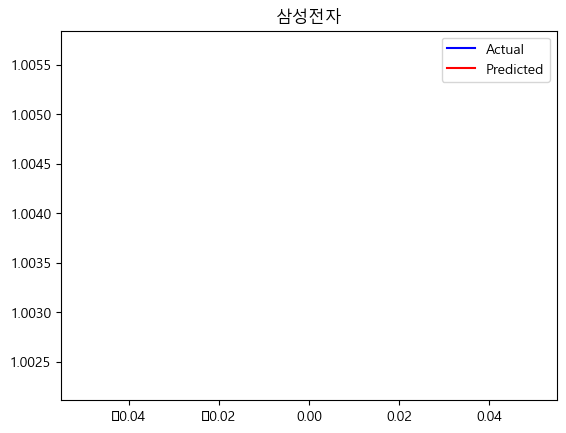

1


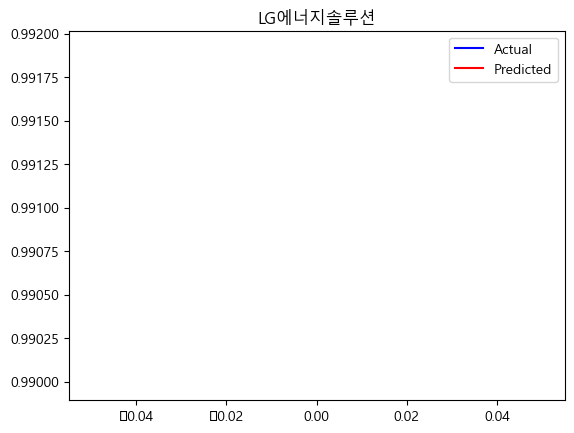

0


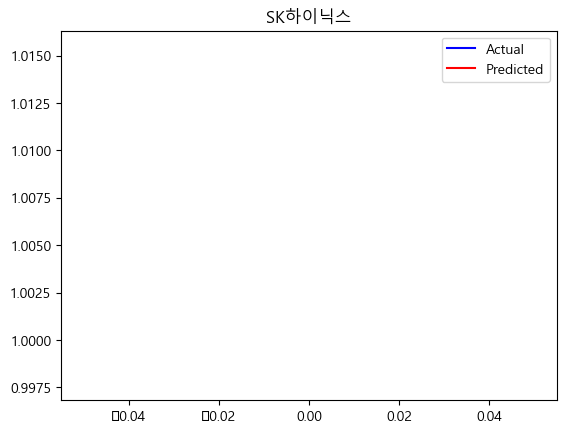

0


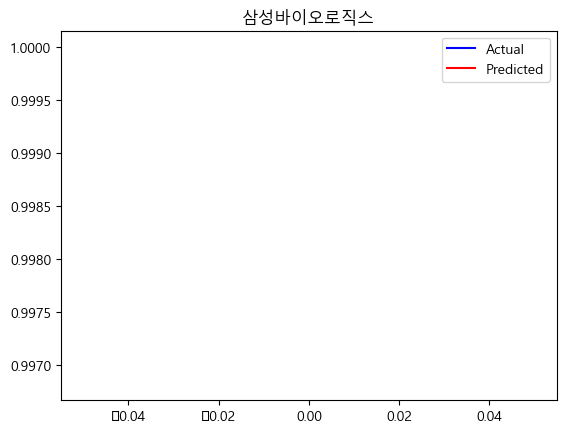

1


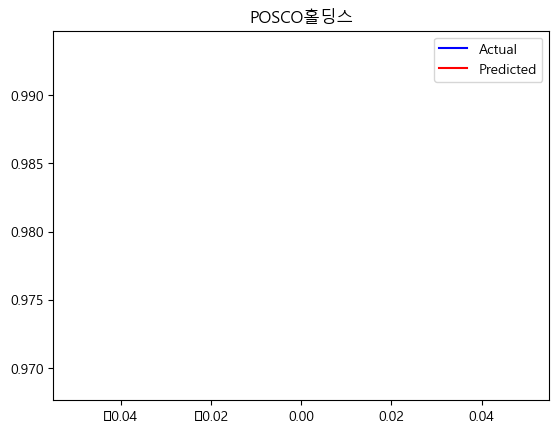

1


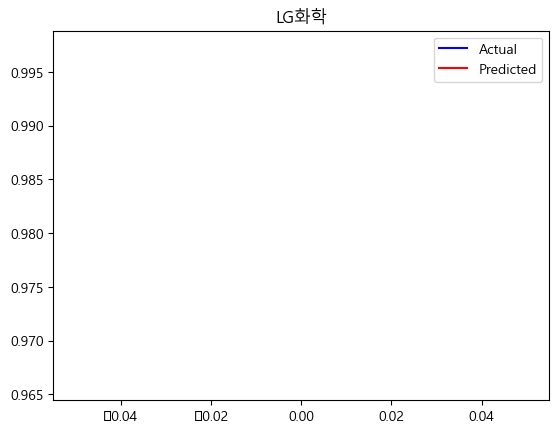

0


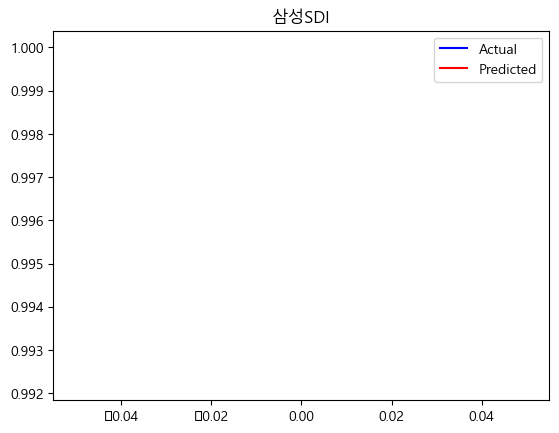

0


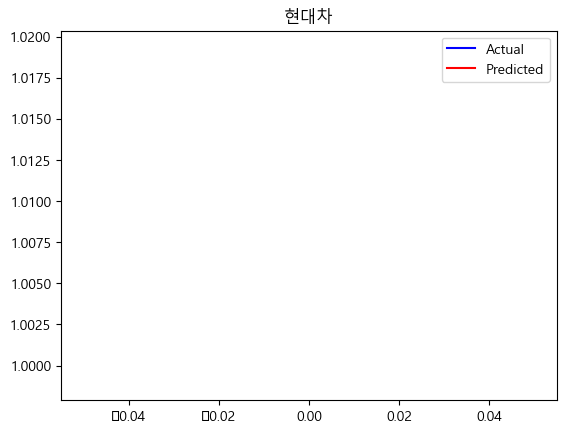

1


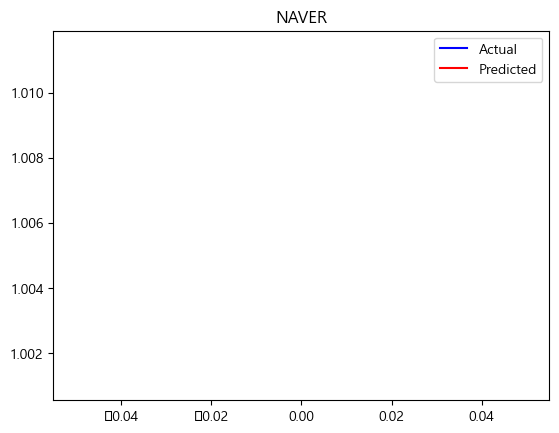

1


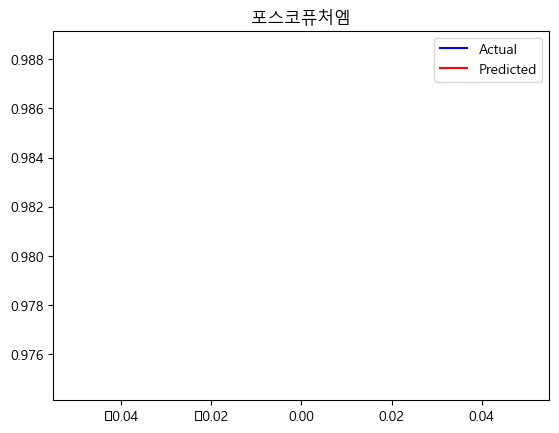

0


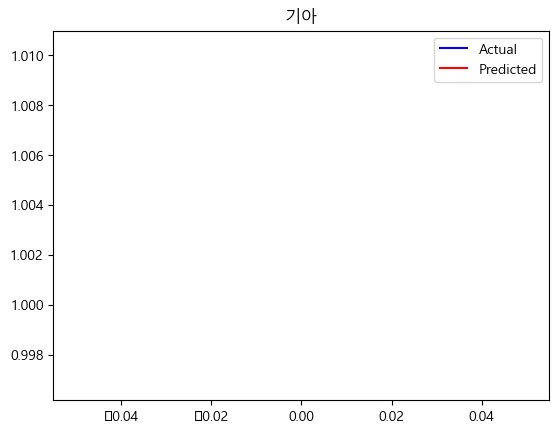

1


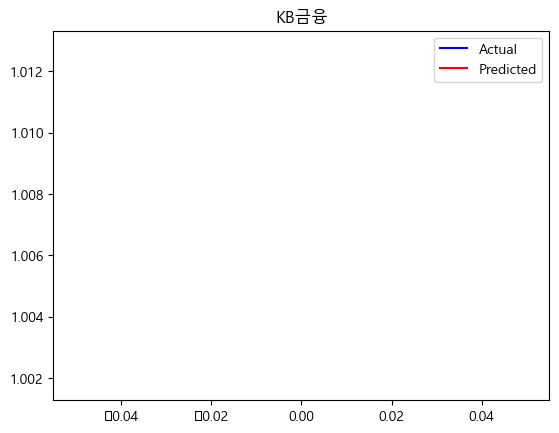

0


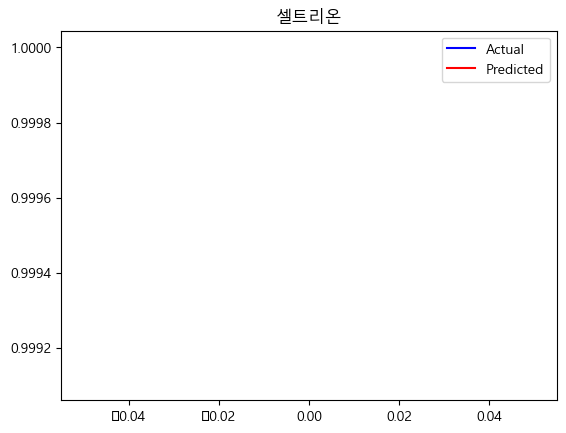

0


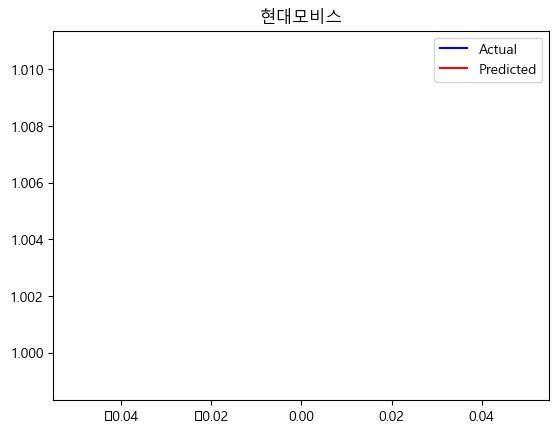

1


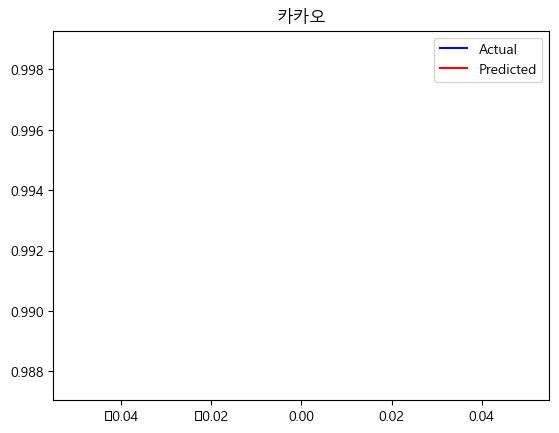

1


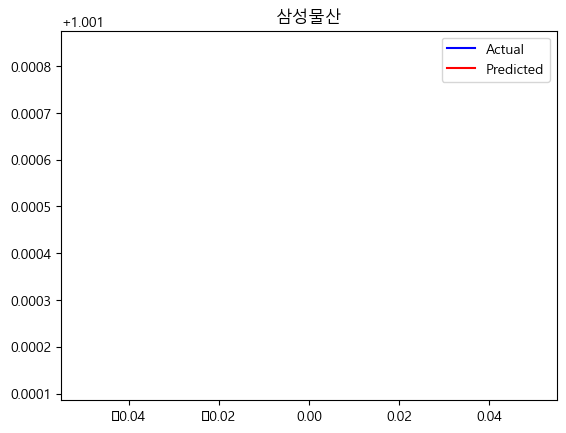

1


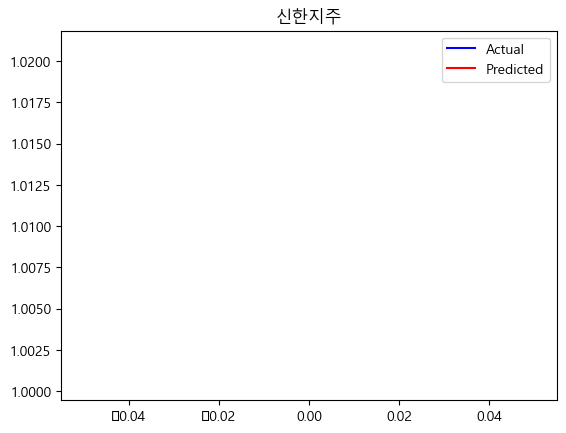

0


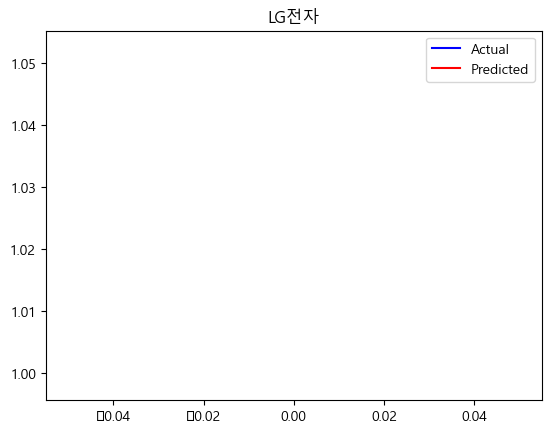

1


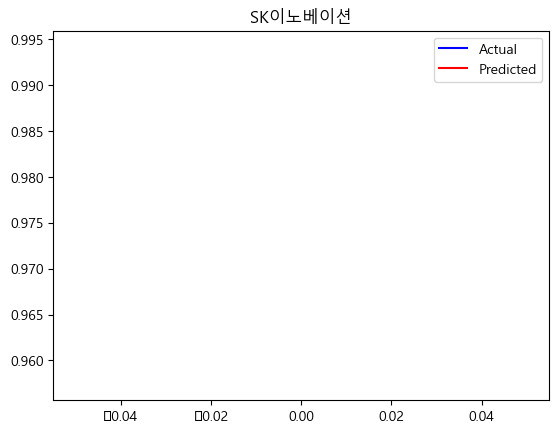

1


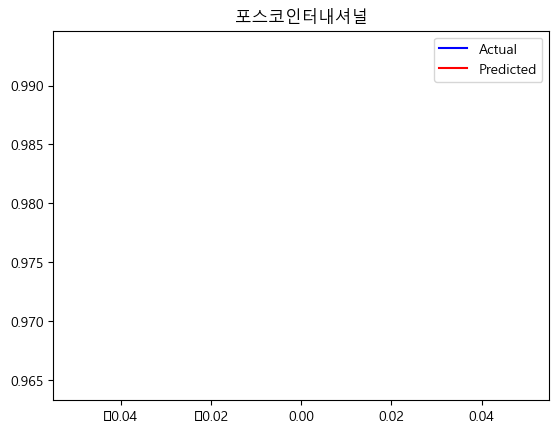

1


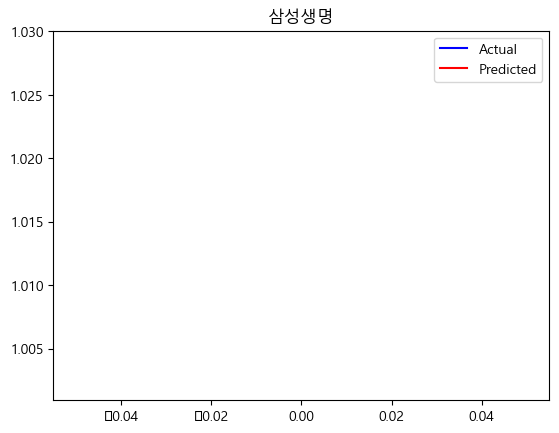

0


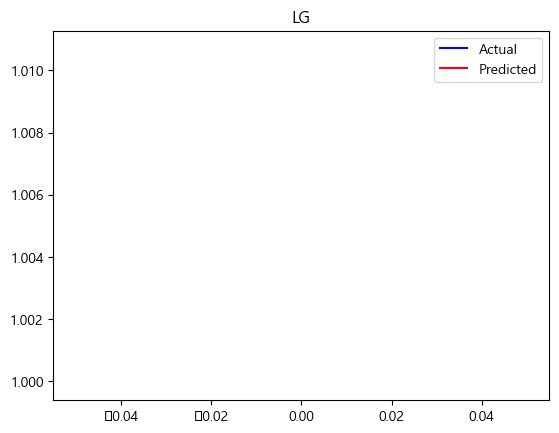

1


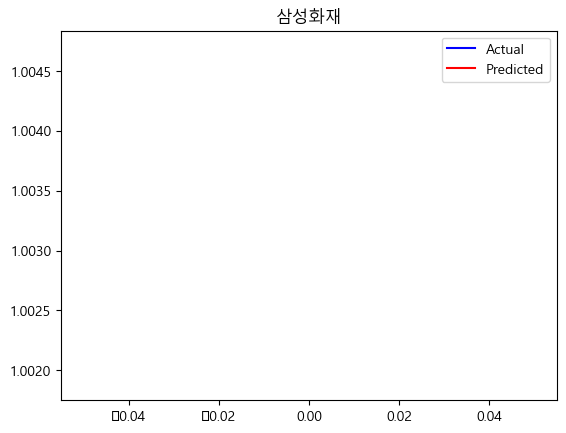

1


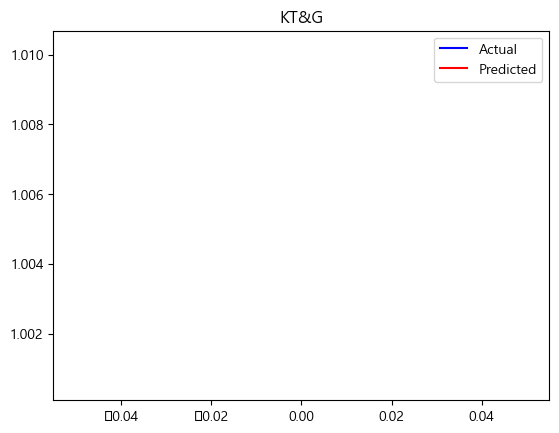

0


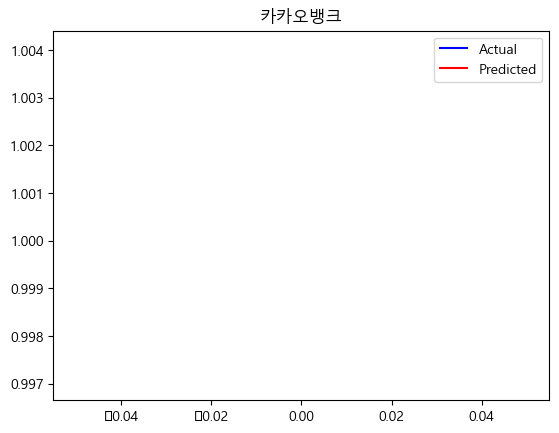

1


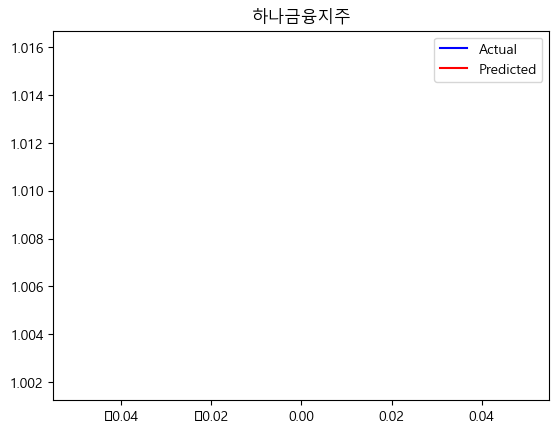

0


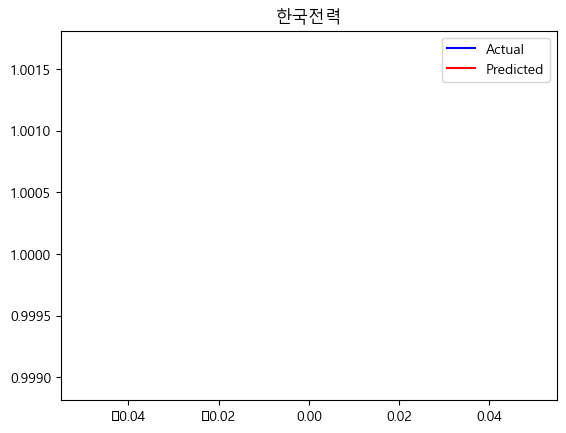

1


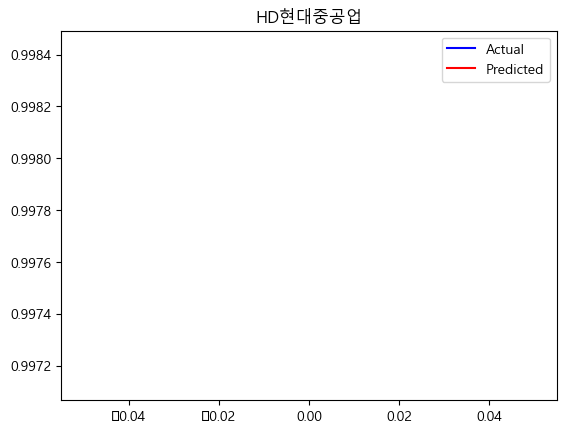

1


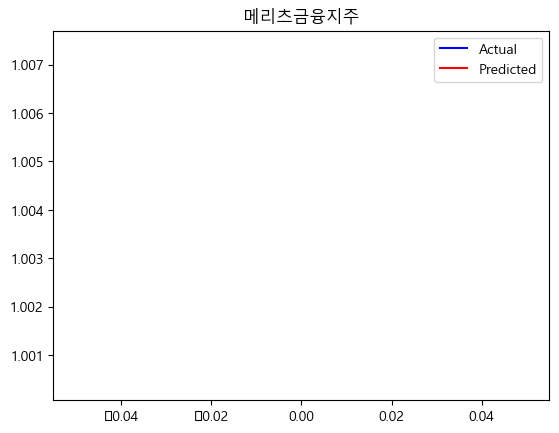

1


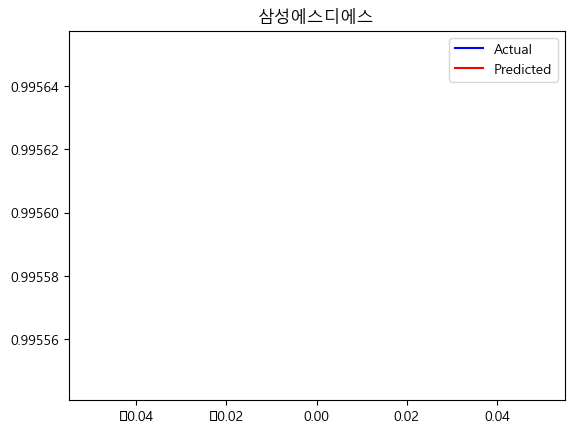

0


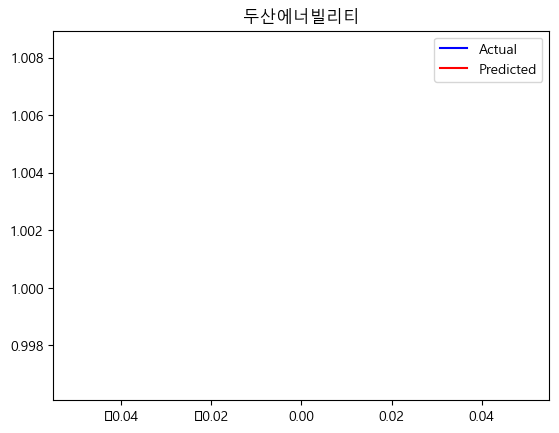

0


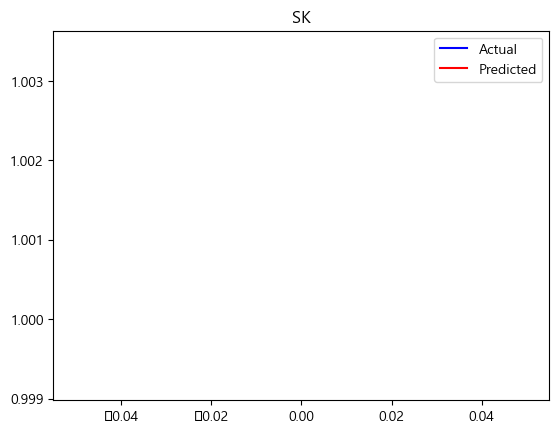

1


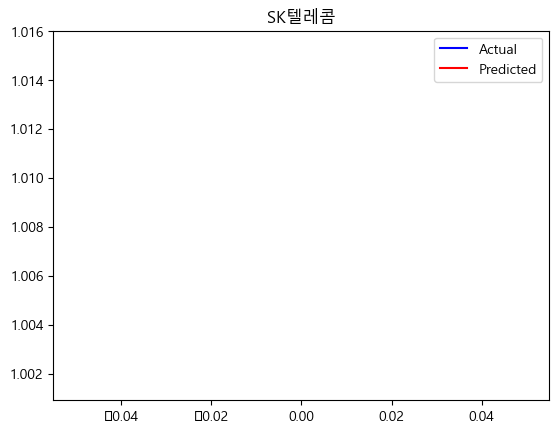

1


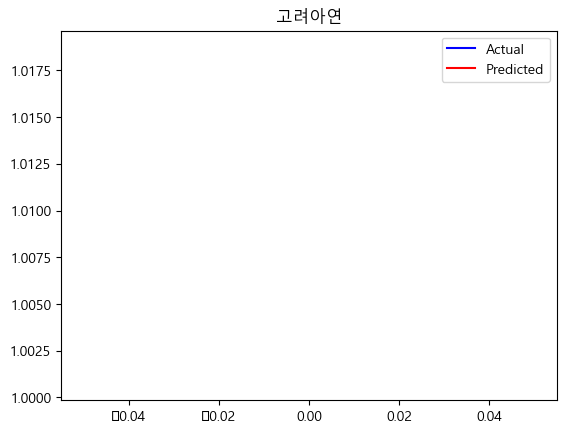

1


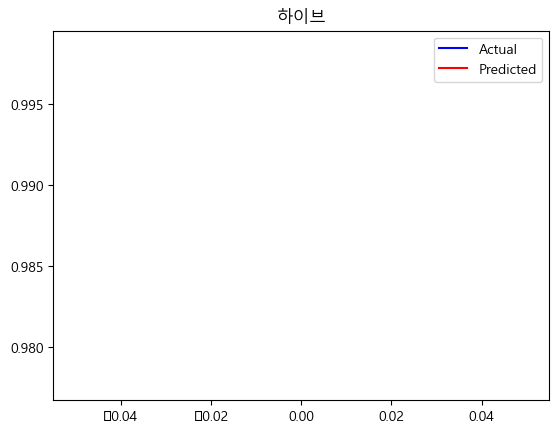

0


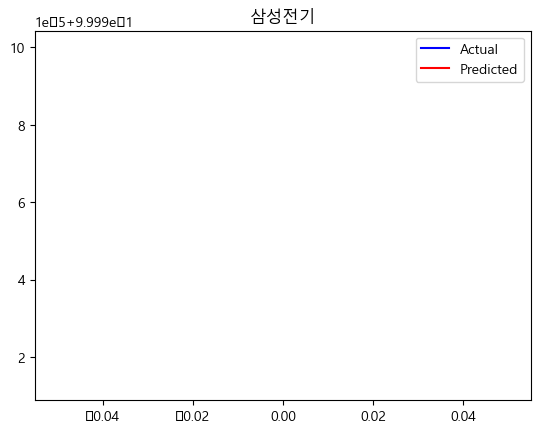

1


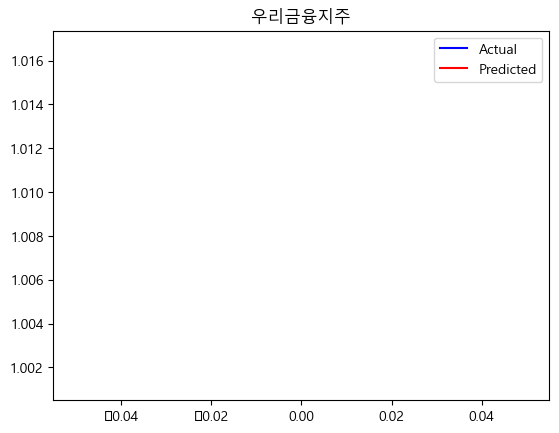

1


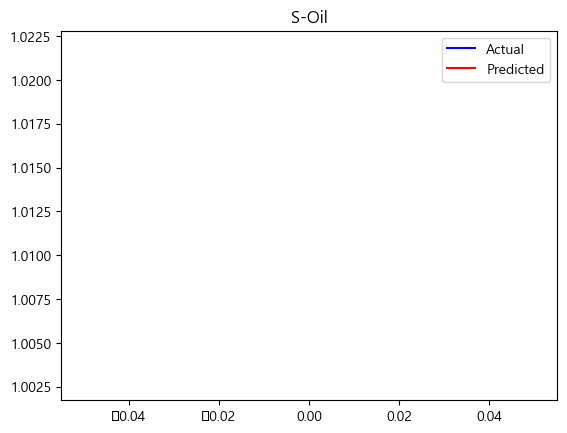

1


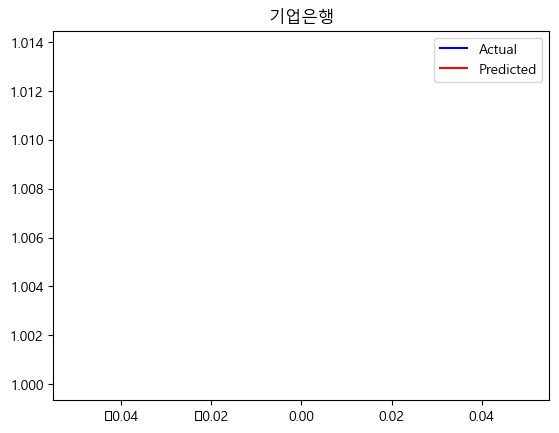

0


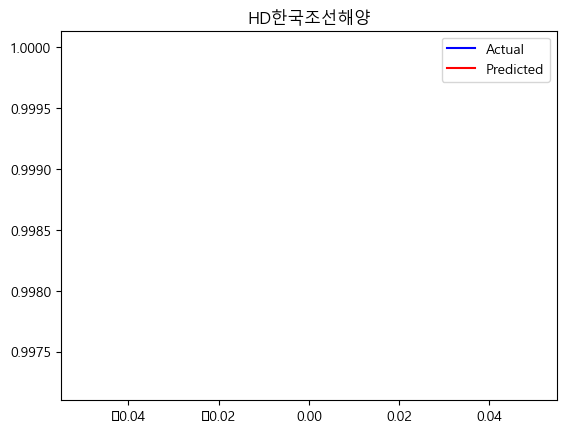

0


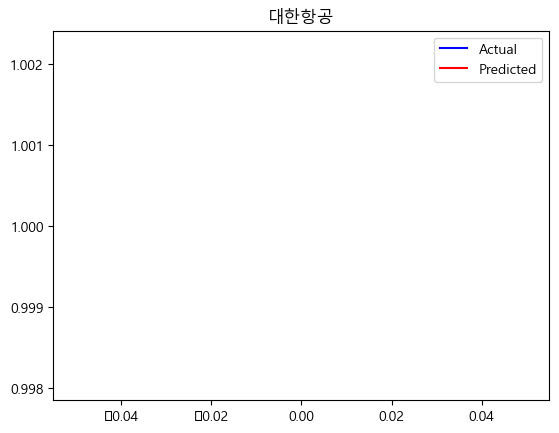

1


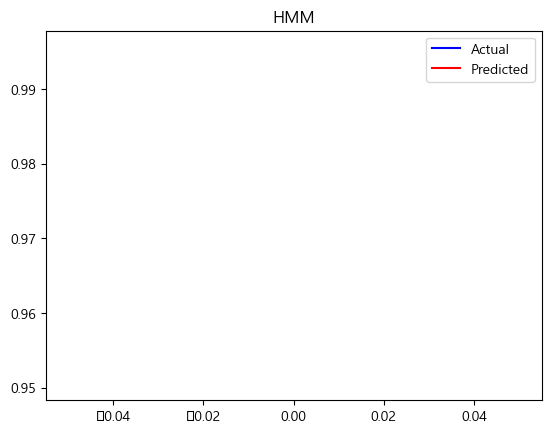

0


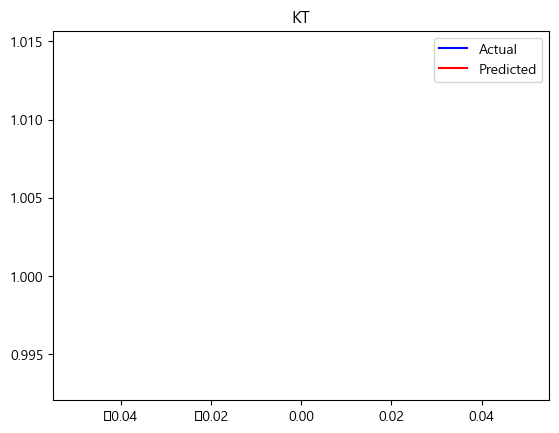

1


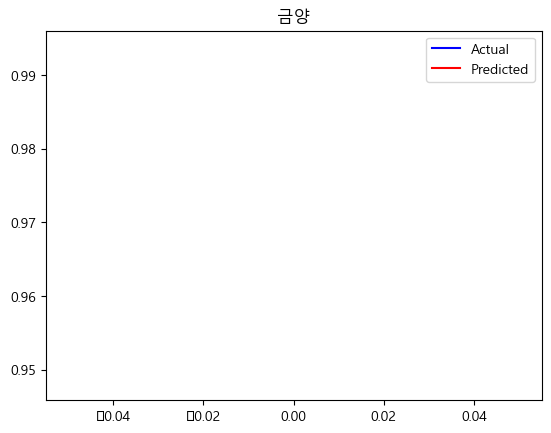

0


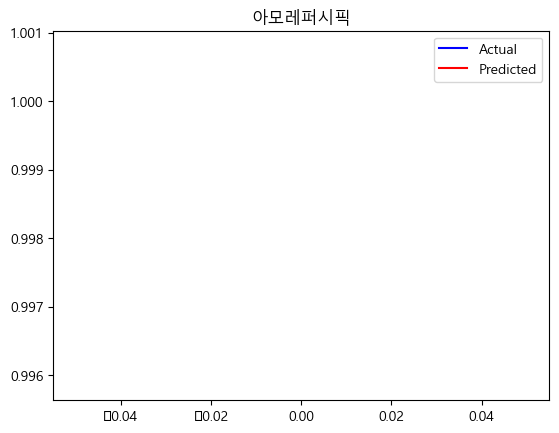

1


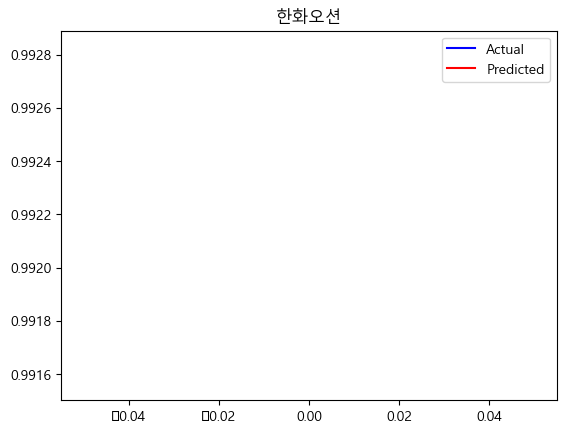

1


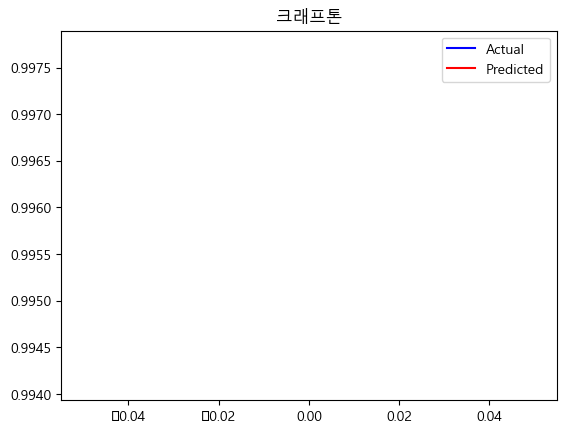

0


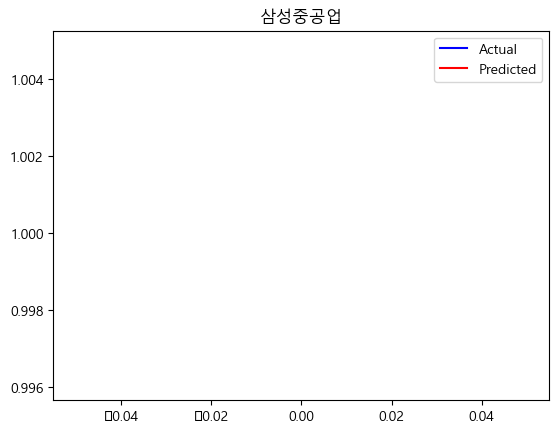

0


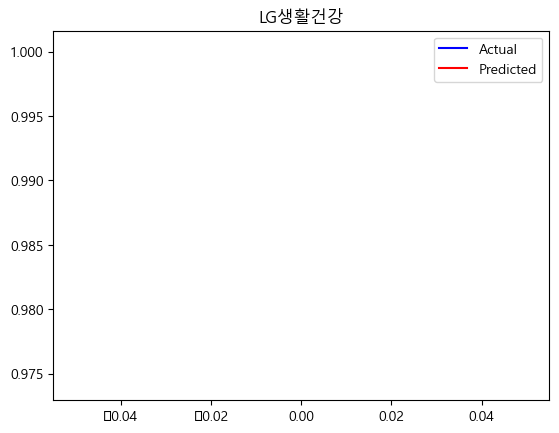

0


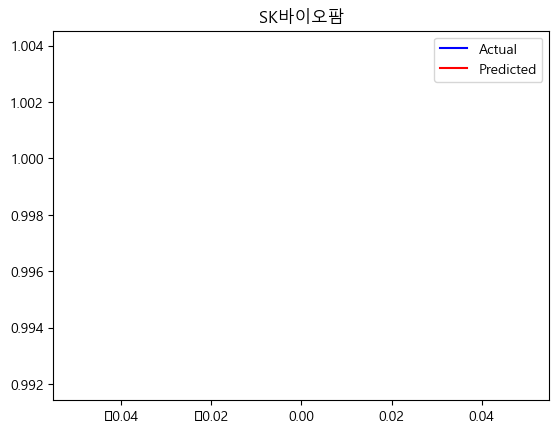

0


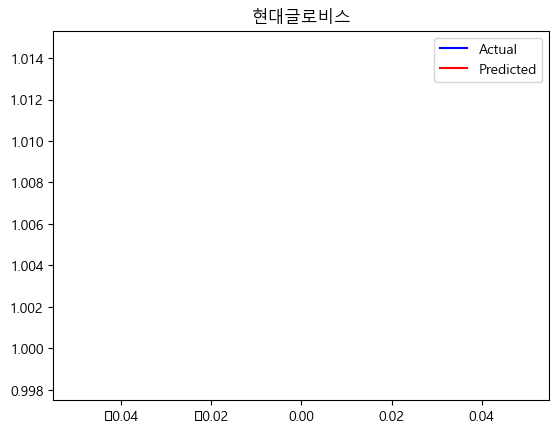

1


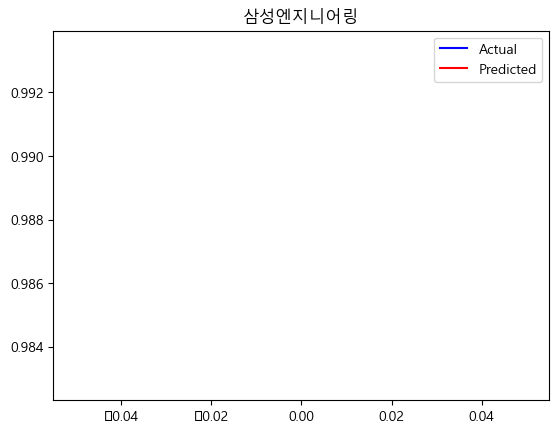

0


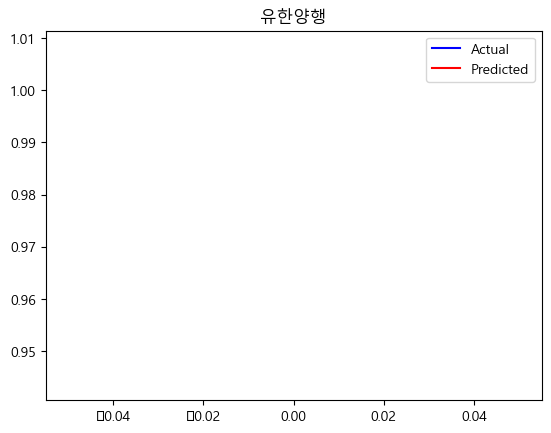

0


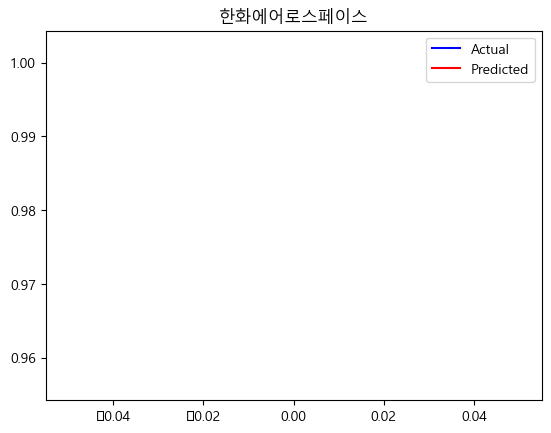

1


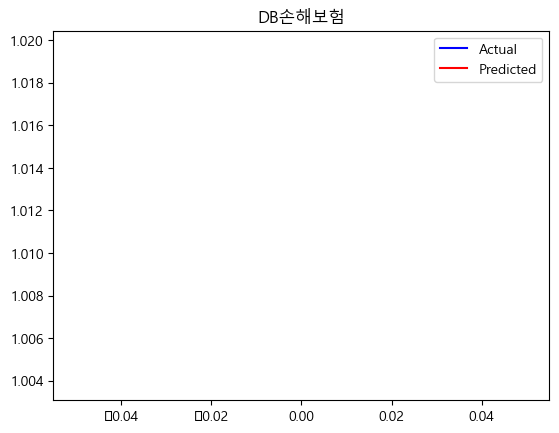

1


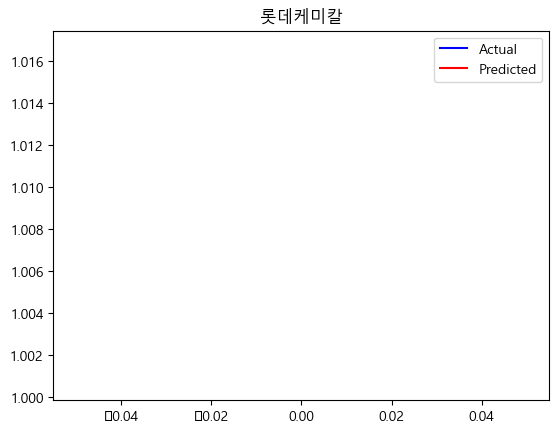

1


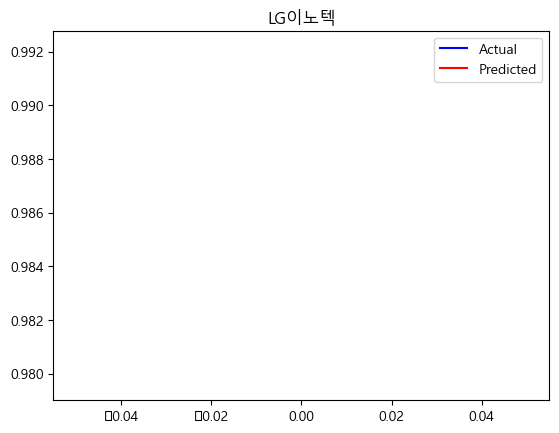

1


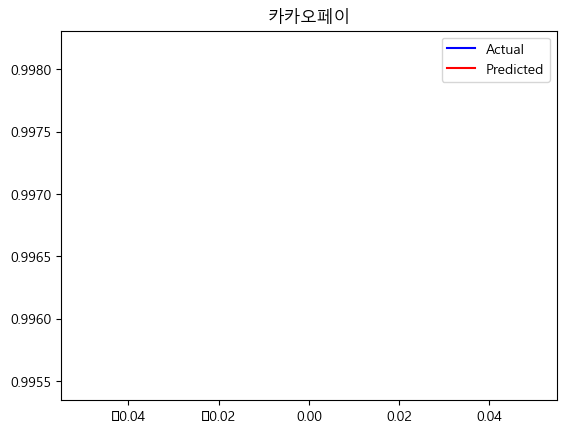

1


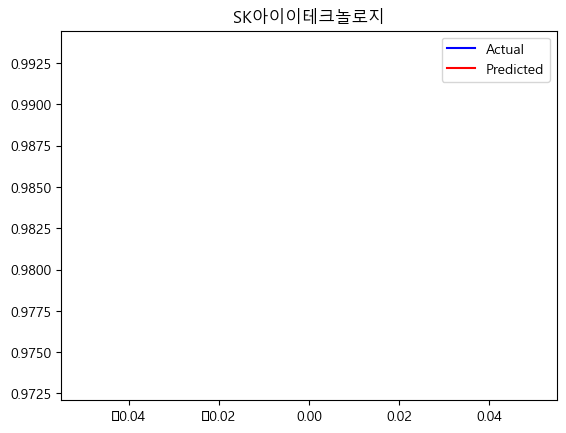

1


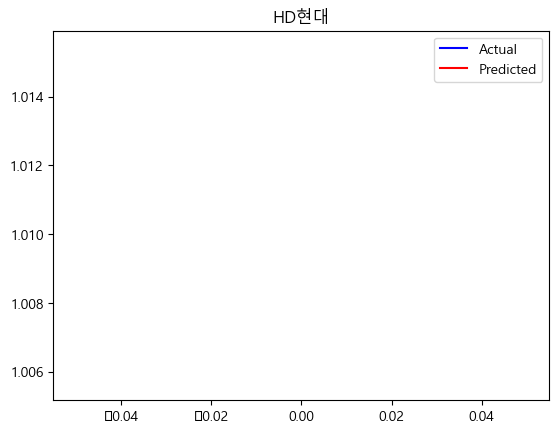

1


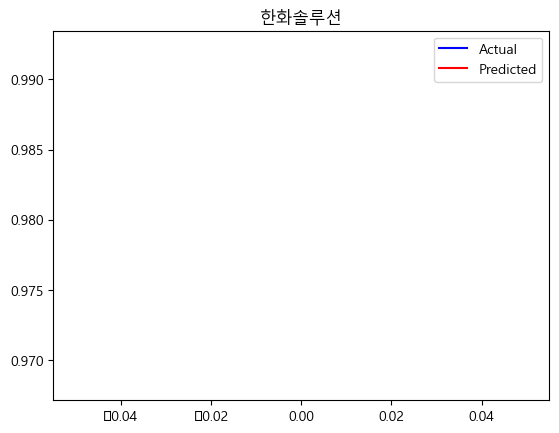

0


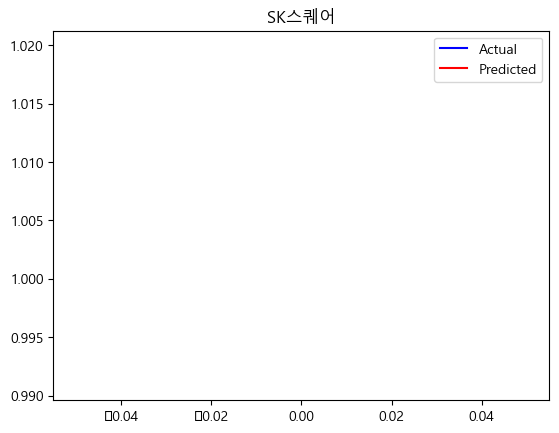

1


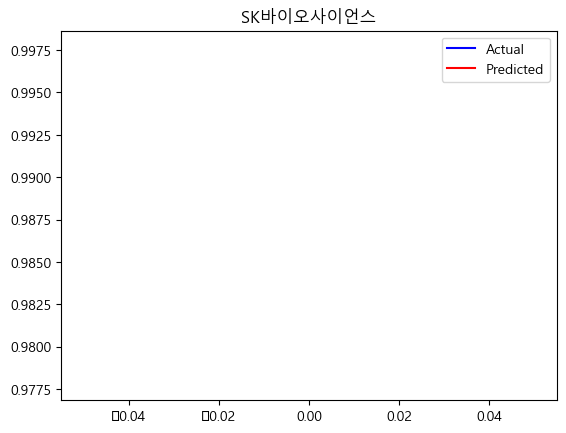

1


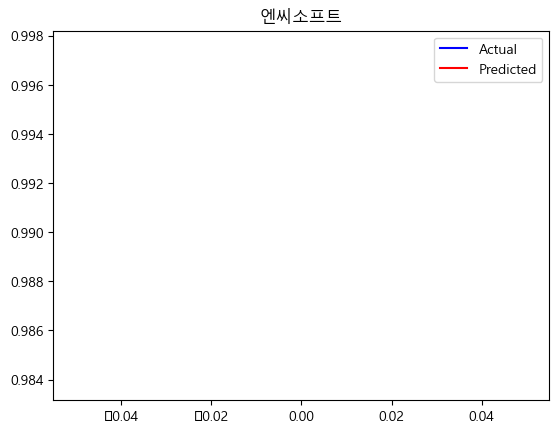

0


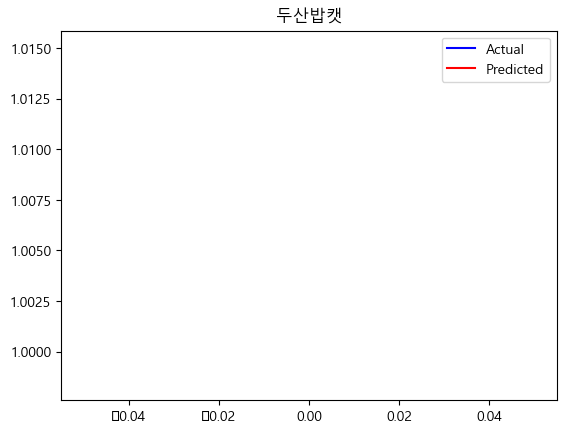

1


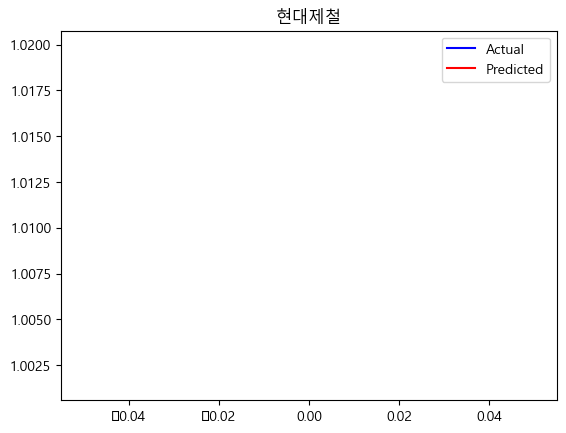

1


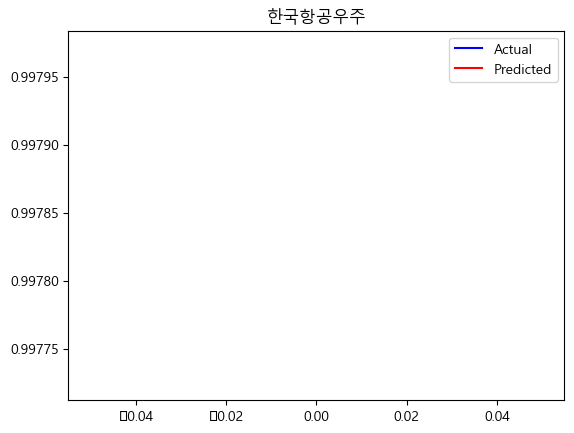

0


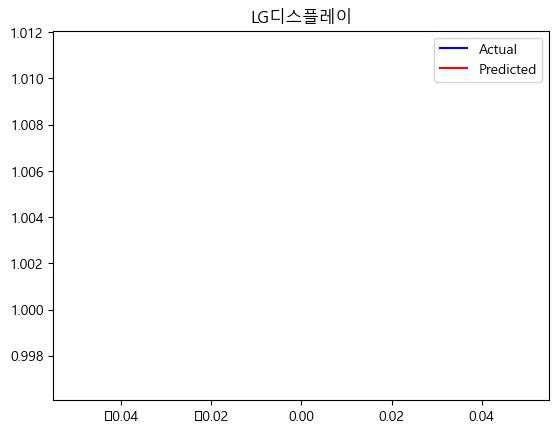

1


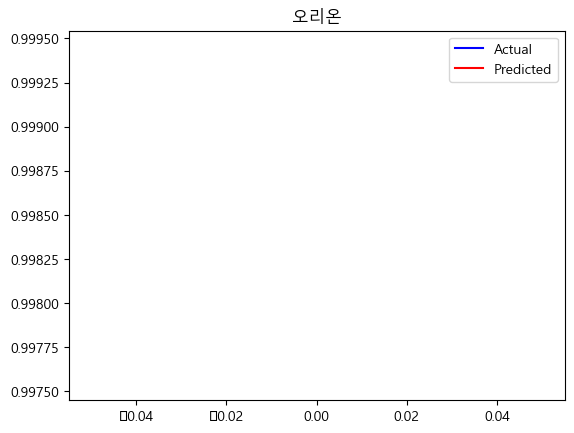

0


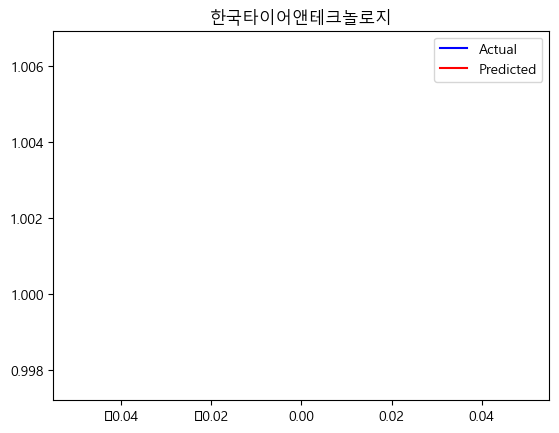

0


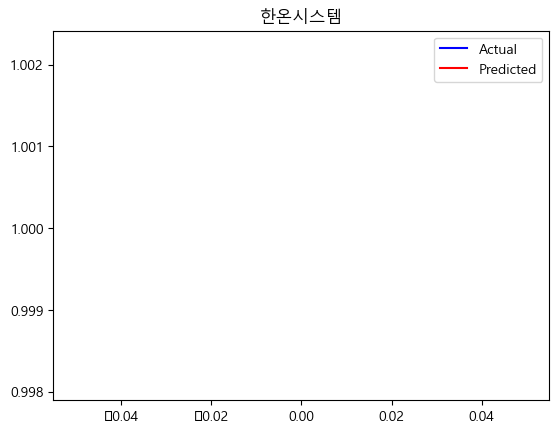

0


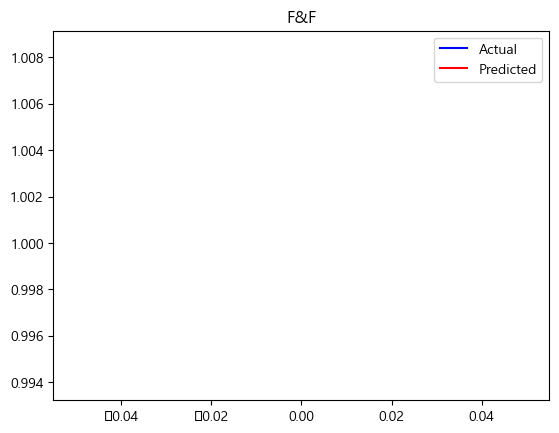

0


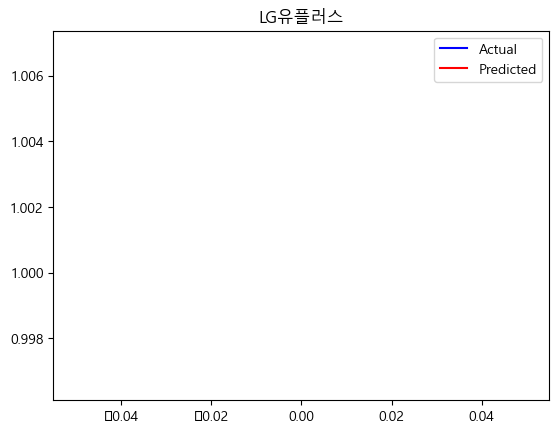

1


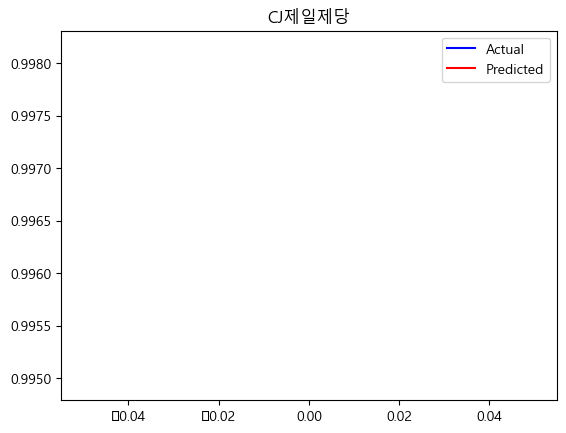

0


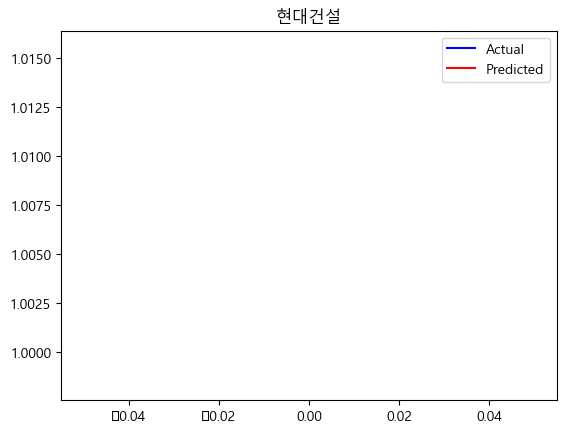

1


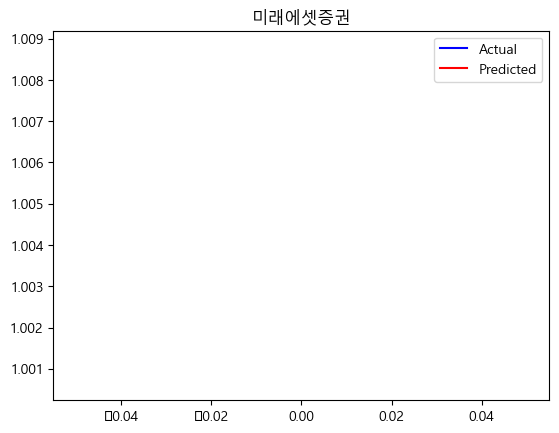

0


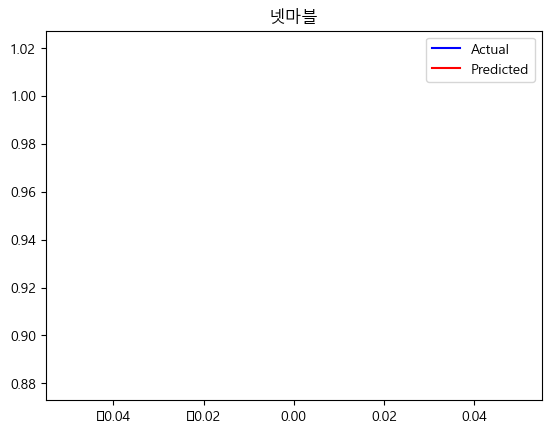

1


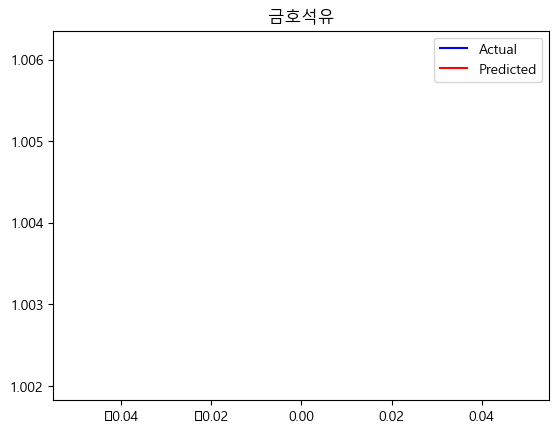

0


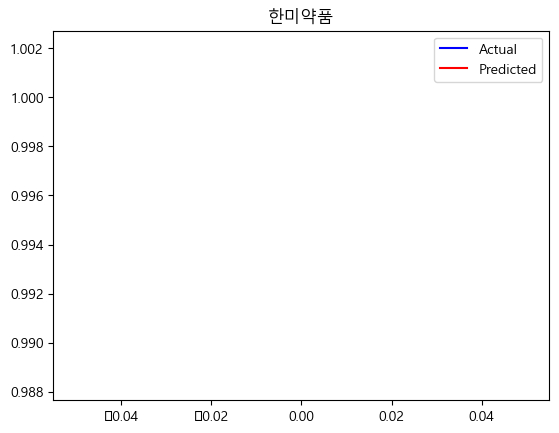

1


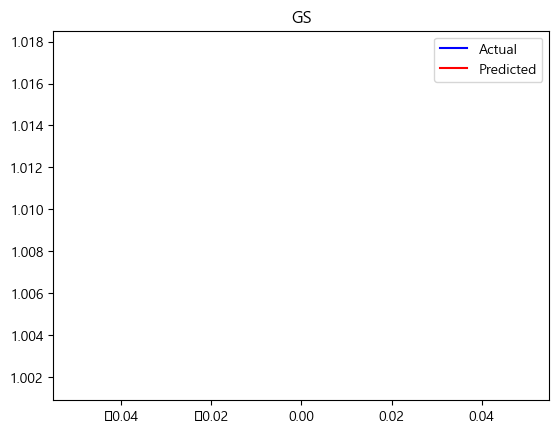

1


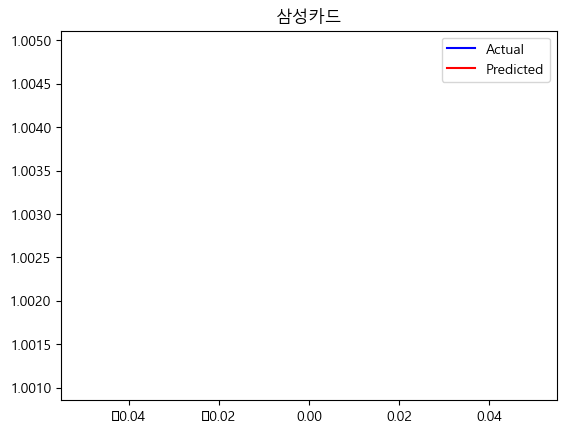

0


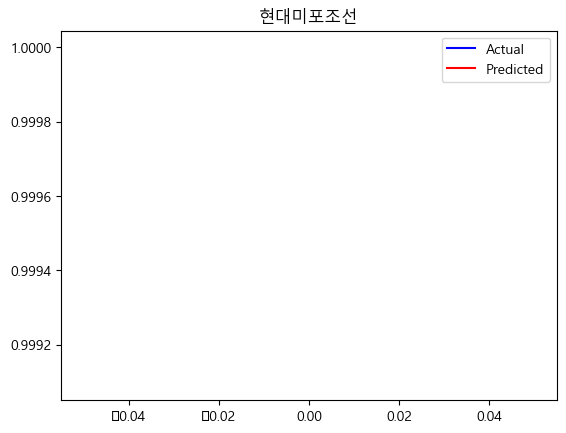

1


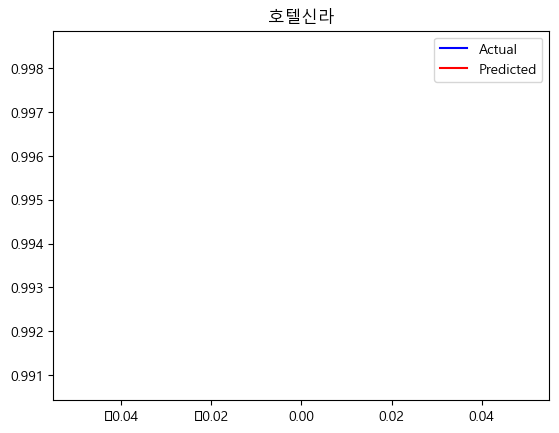

0


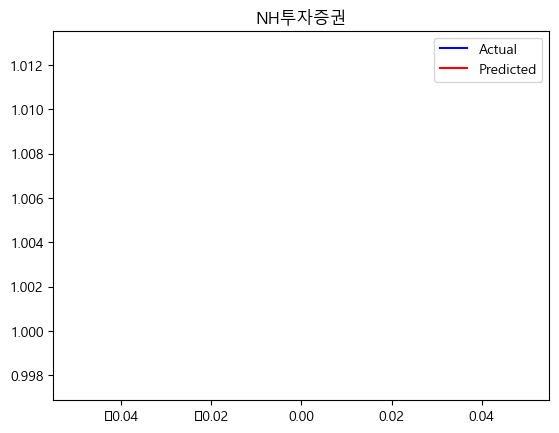

1


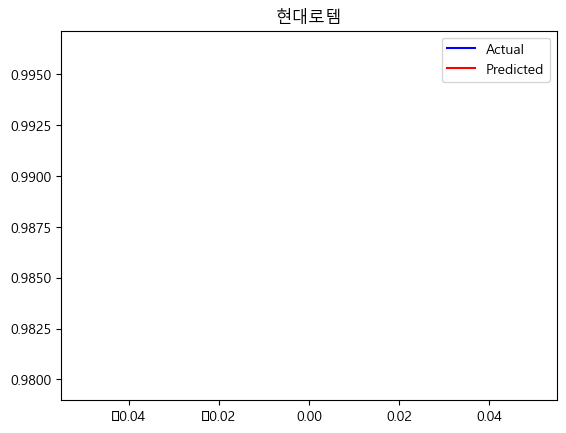

1


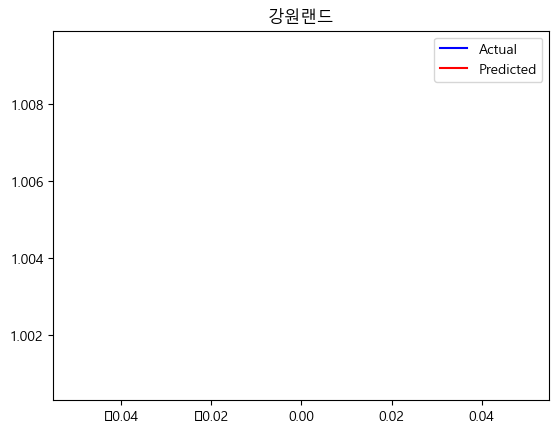

1


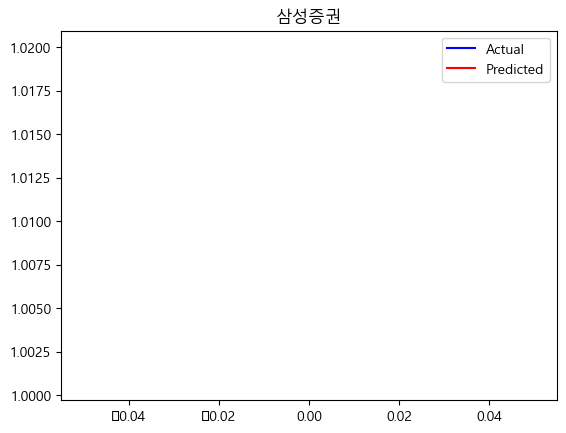

1


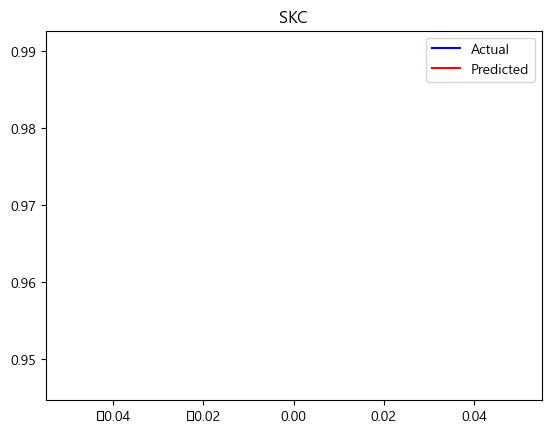

1


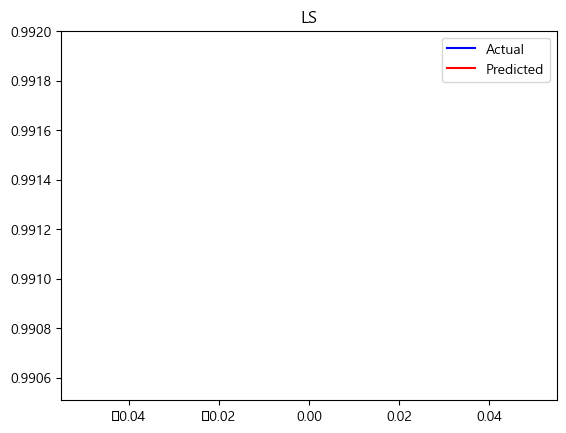

1


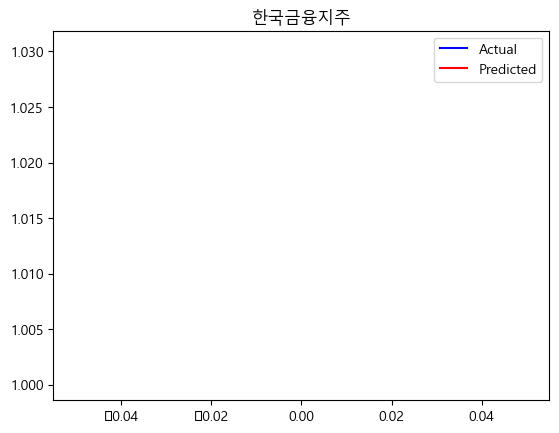

1


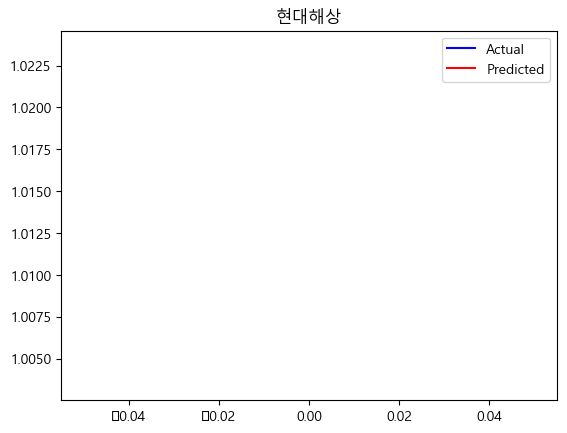

1


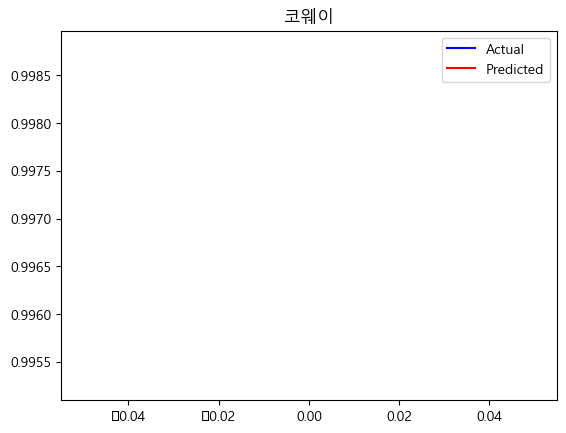

1


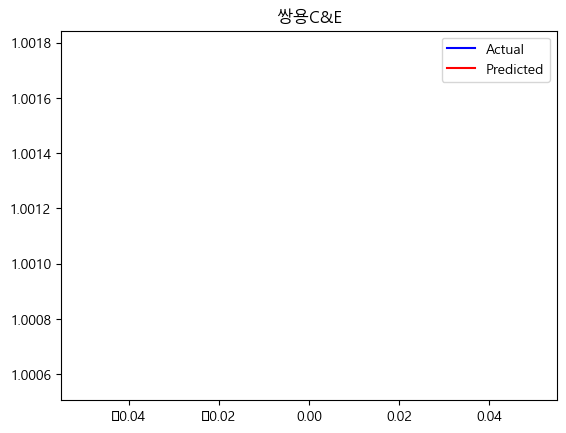

1


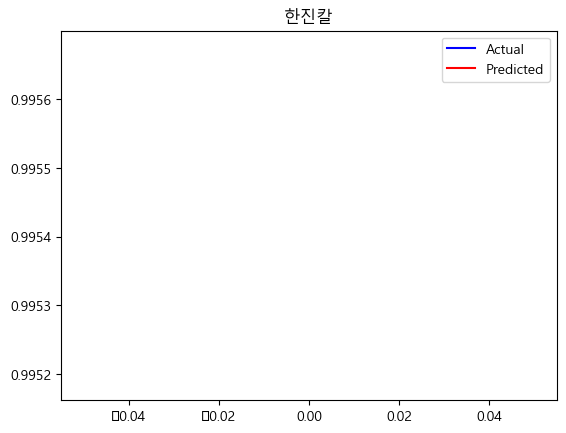

1


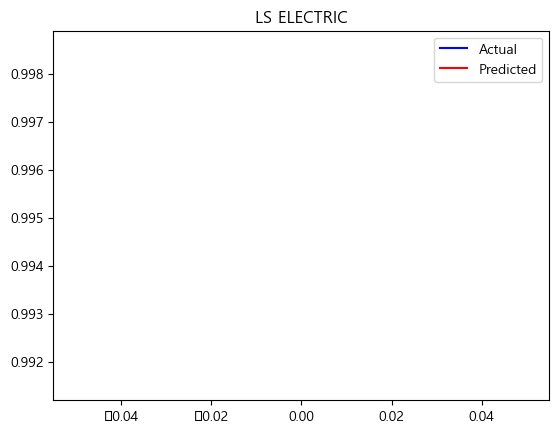

0


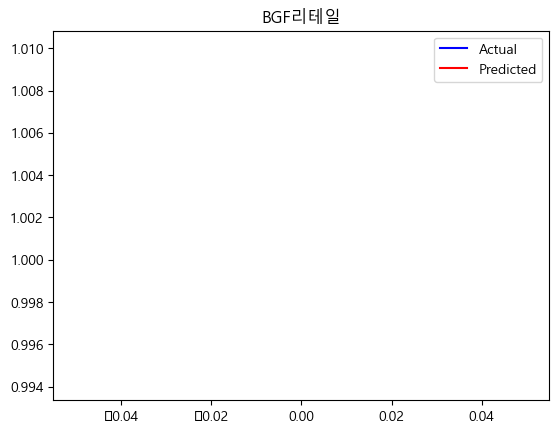

1


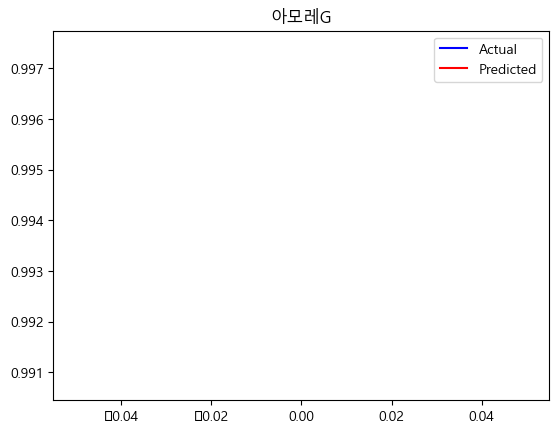

1


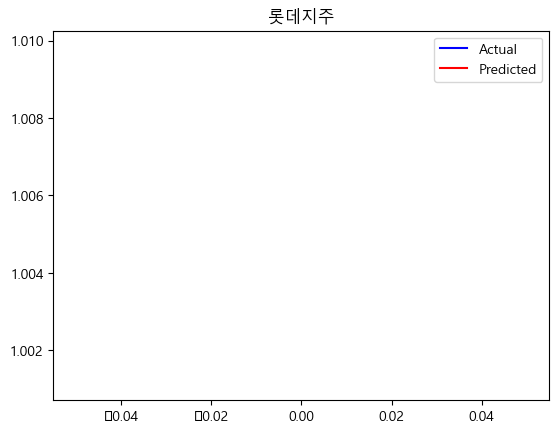

1


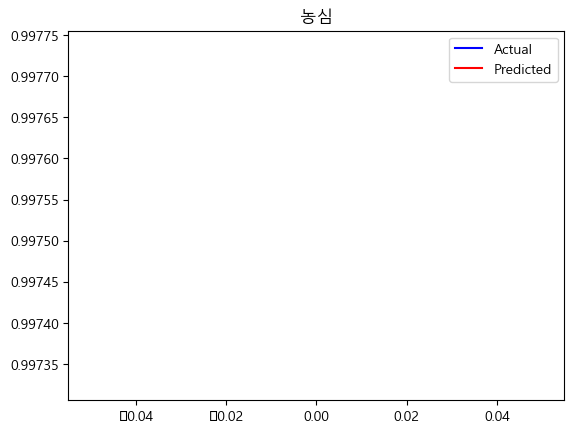

0


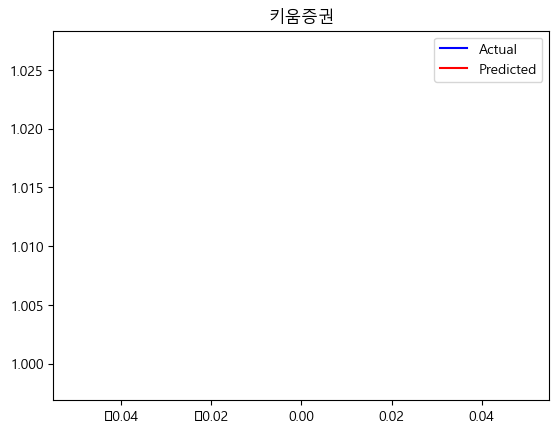

0


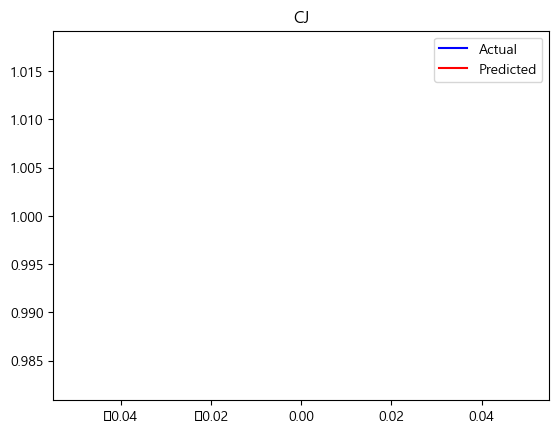

1


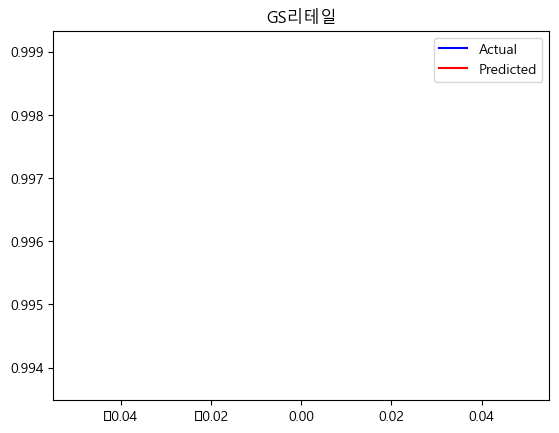

1


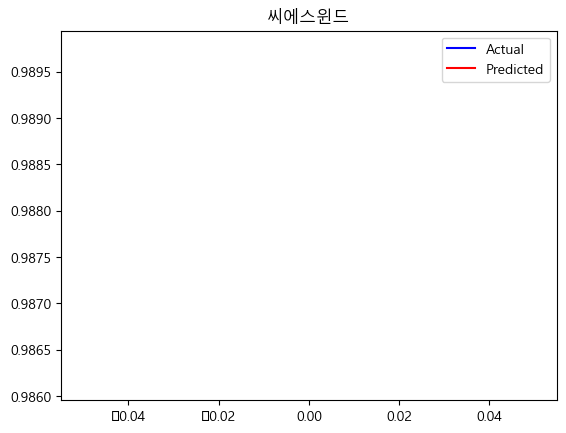

1


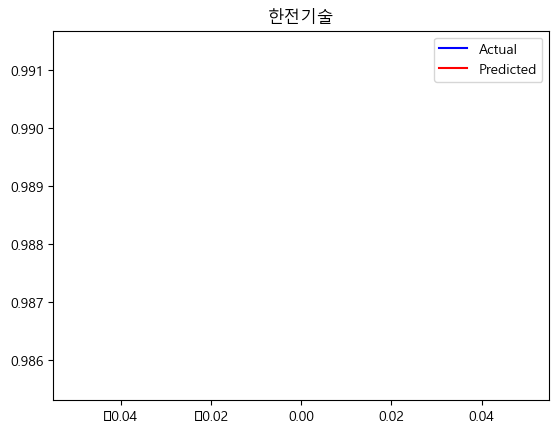

0


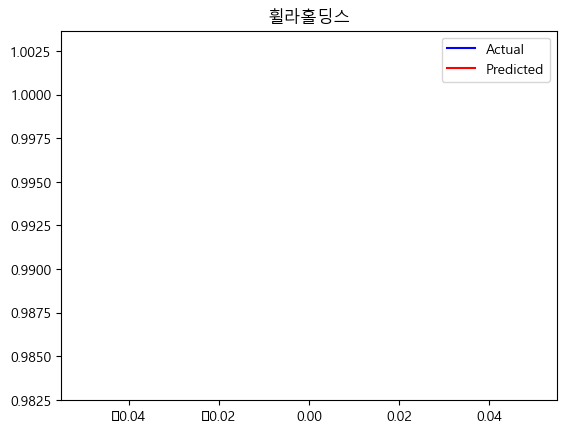

0


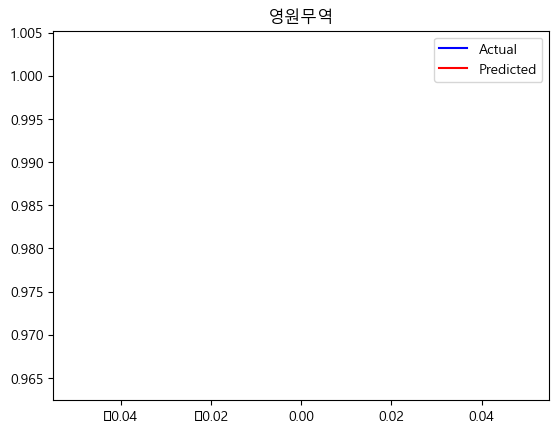

0


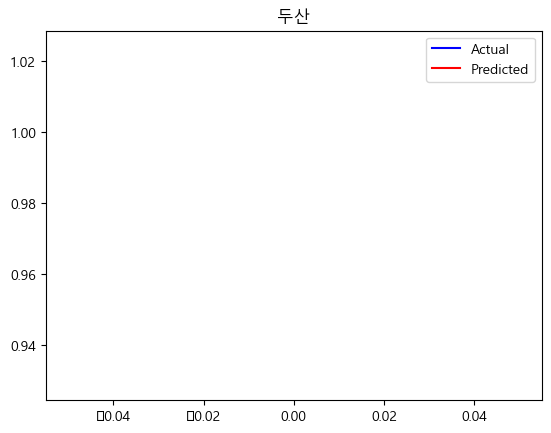

1


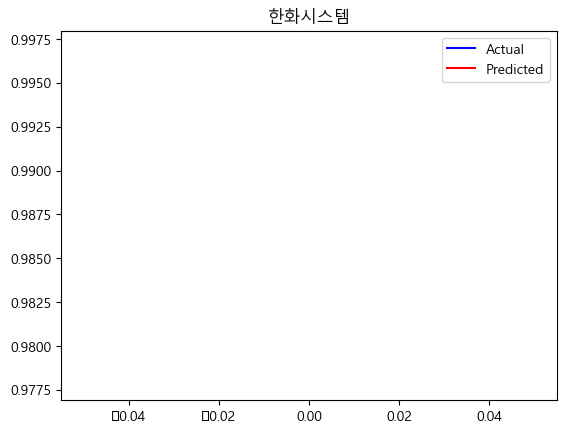

1


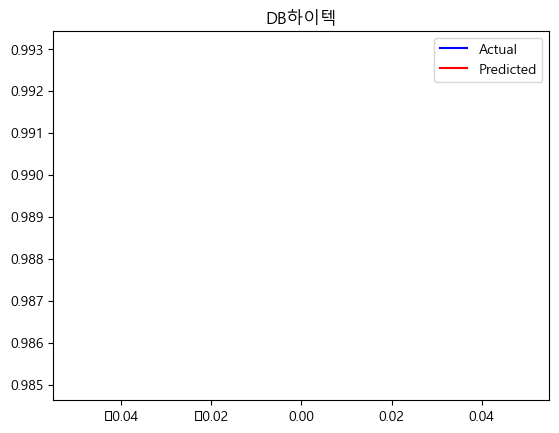

1


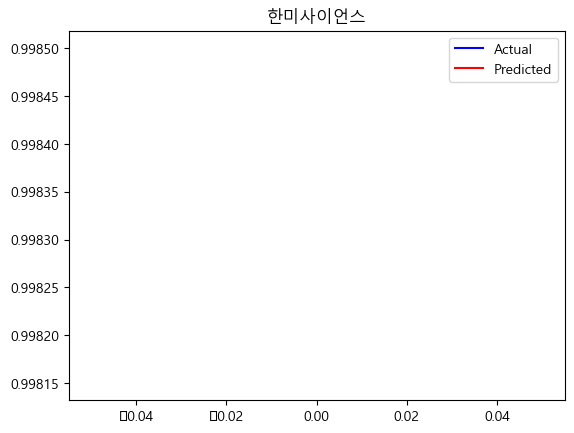

0


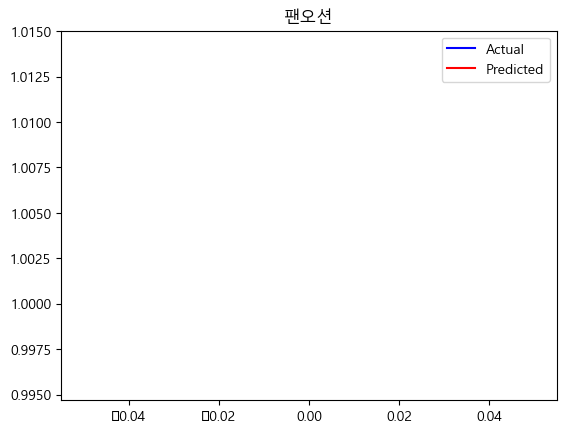

0


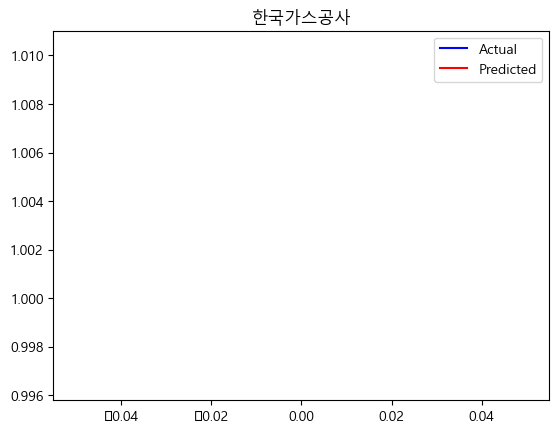

1


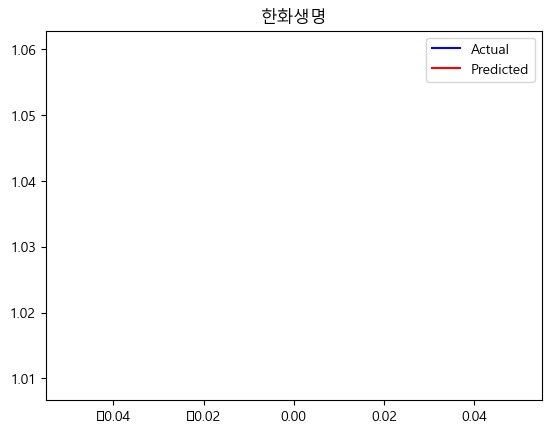

1


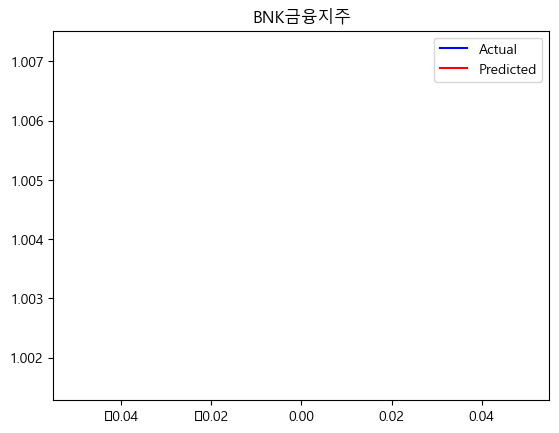

0


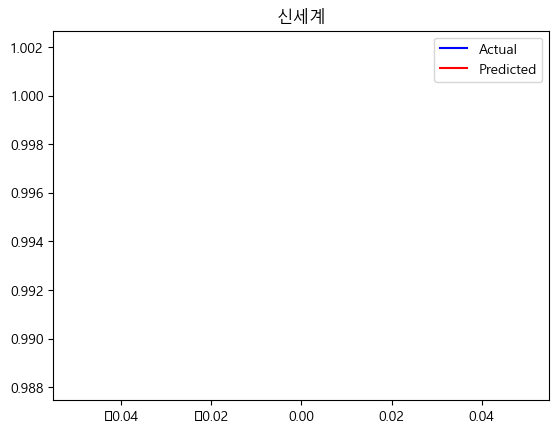

0


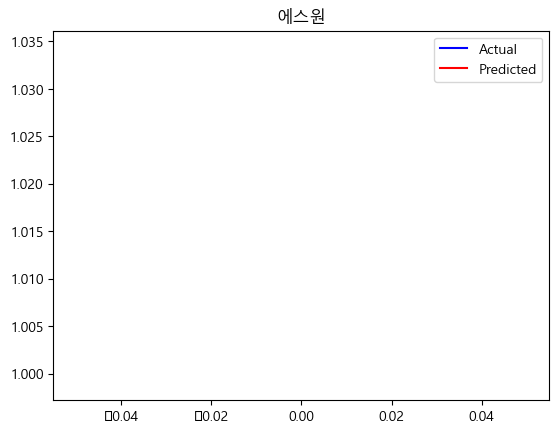

0


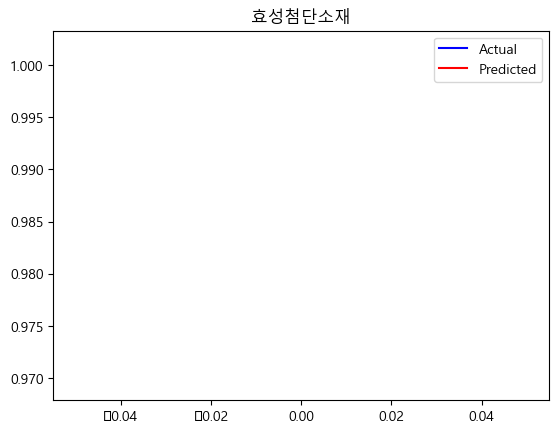

0


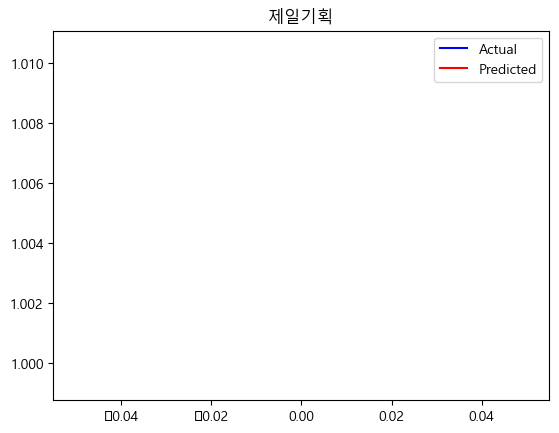

1


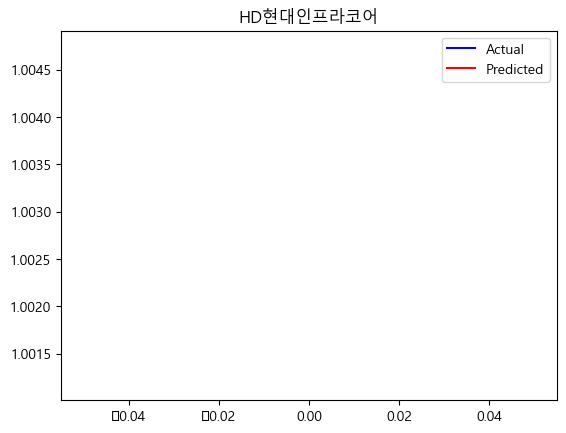

1


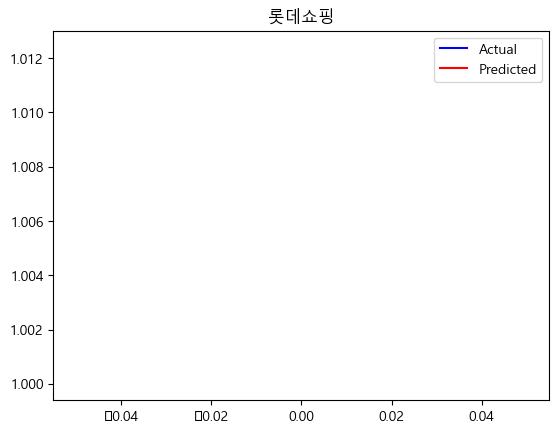

0


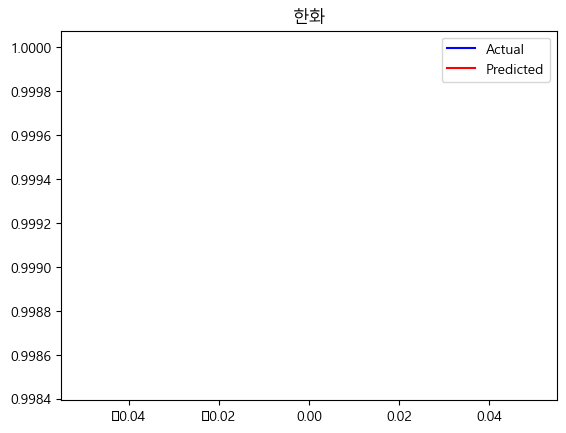

1


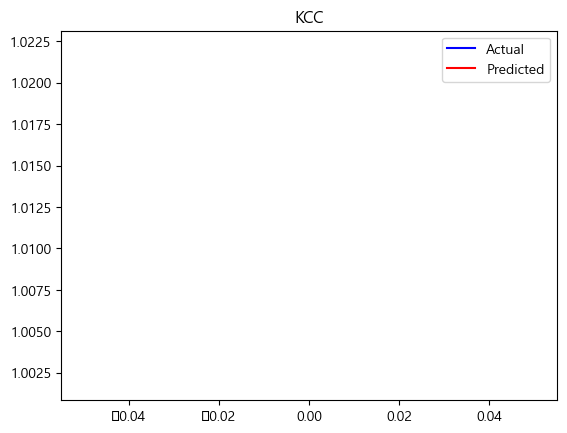

1


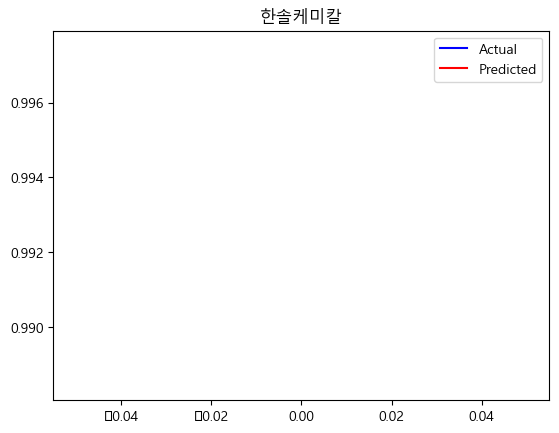

1


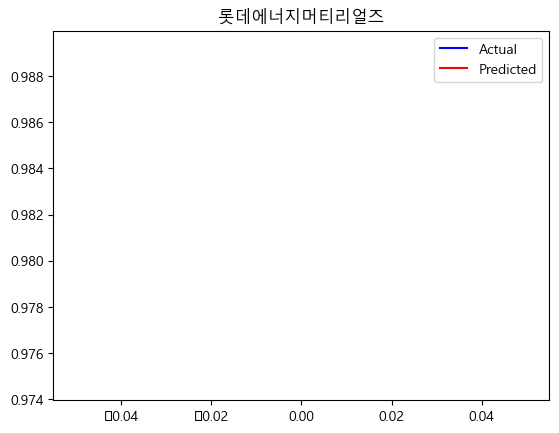

0


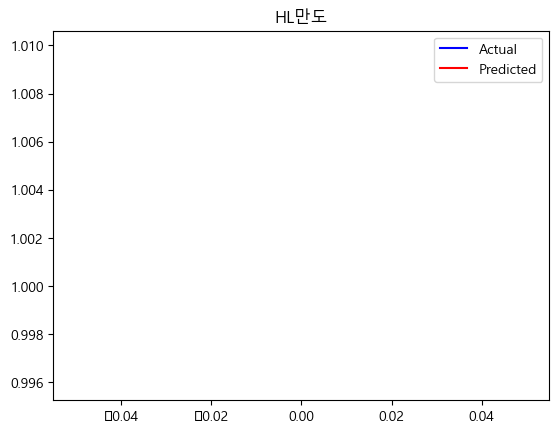

1


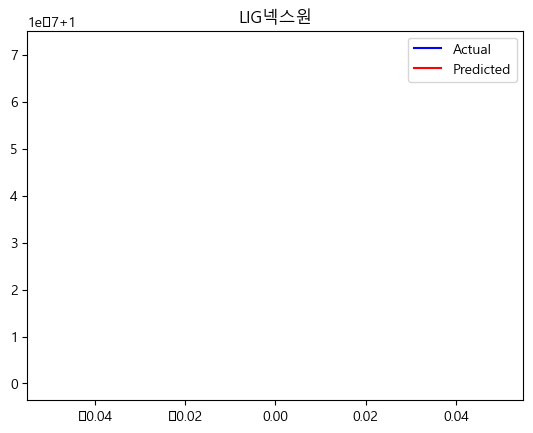

0


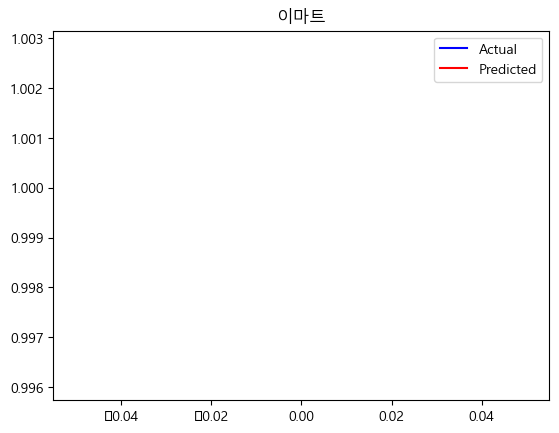

0


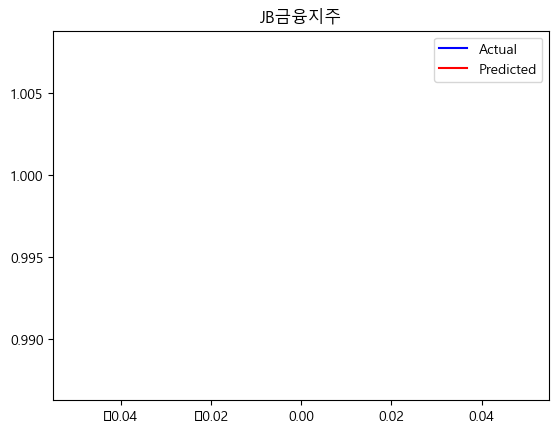

0


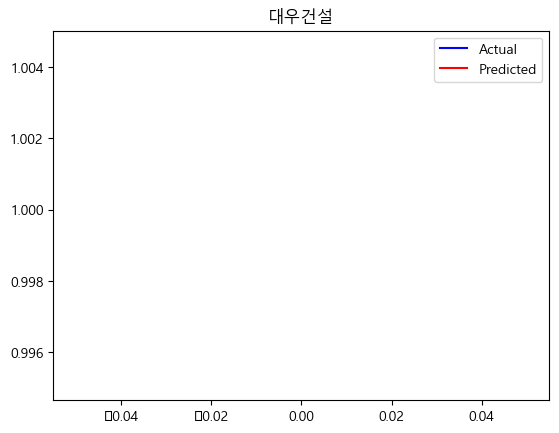

1


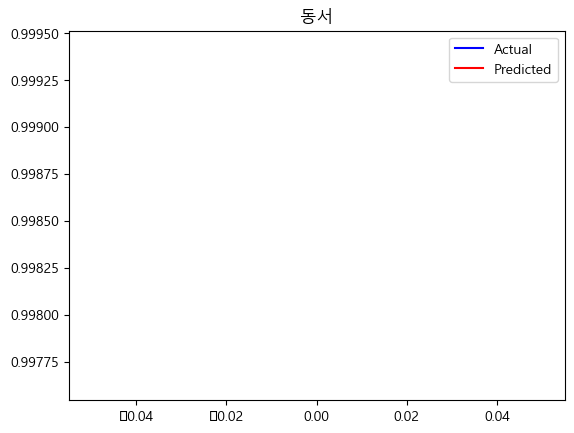

1


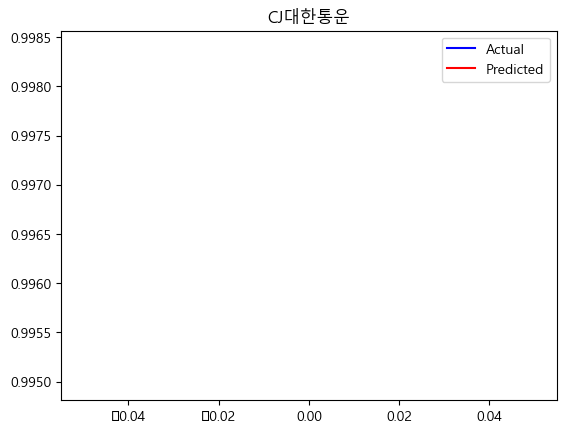

1


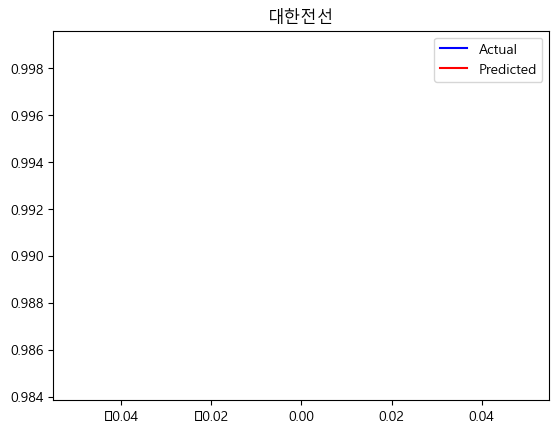

1


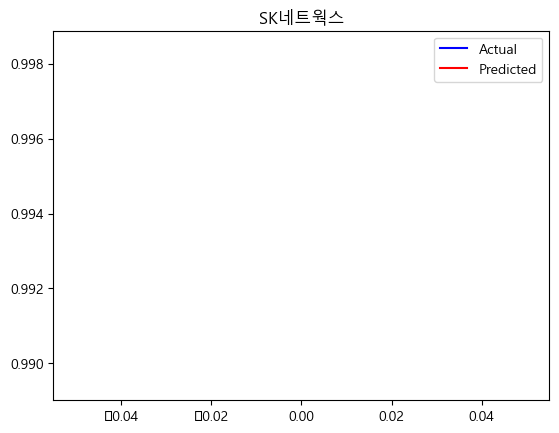

1


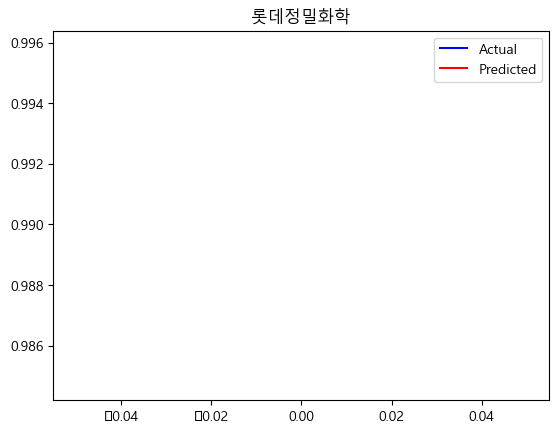

0


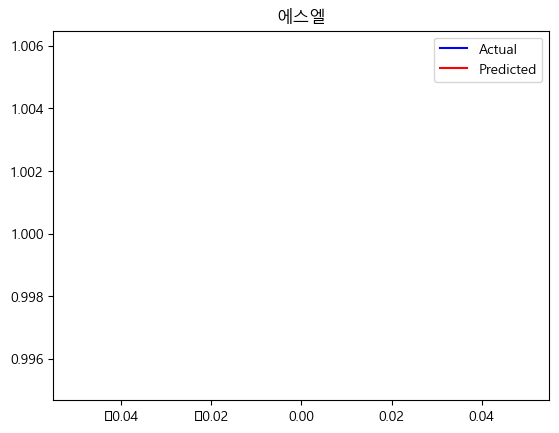

0


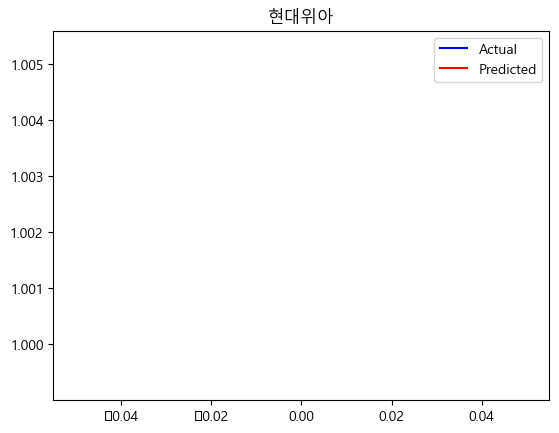

1


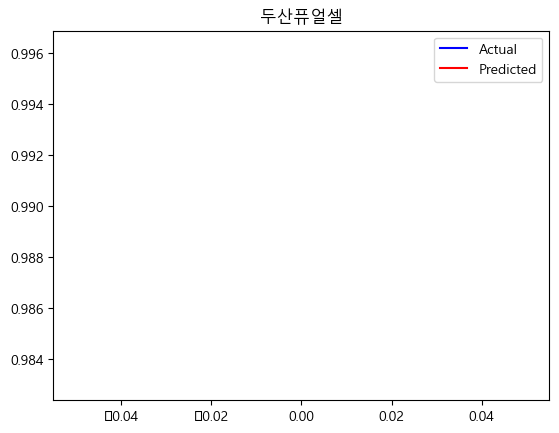

1


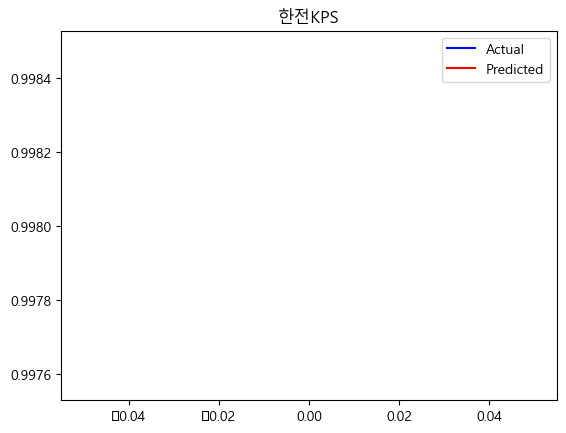

1


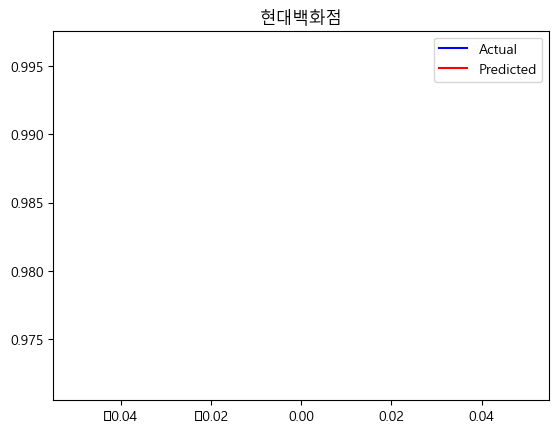

0


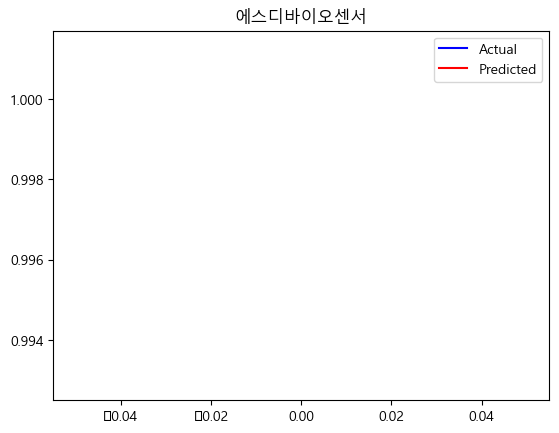

1


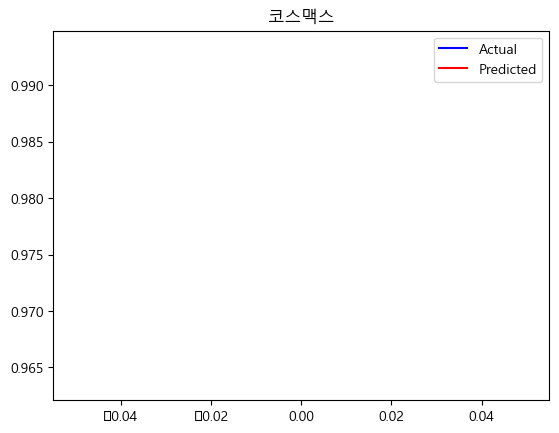

1


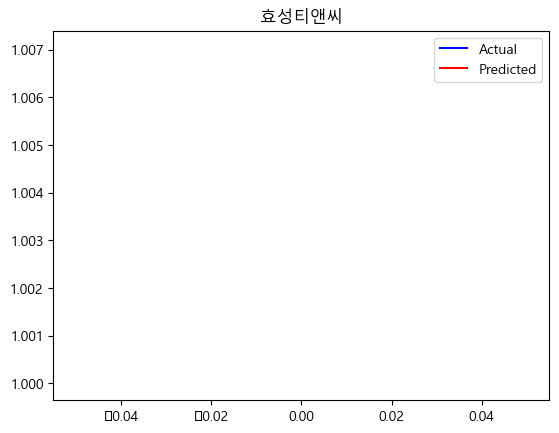

1


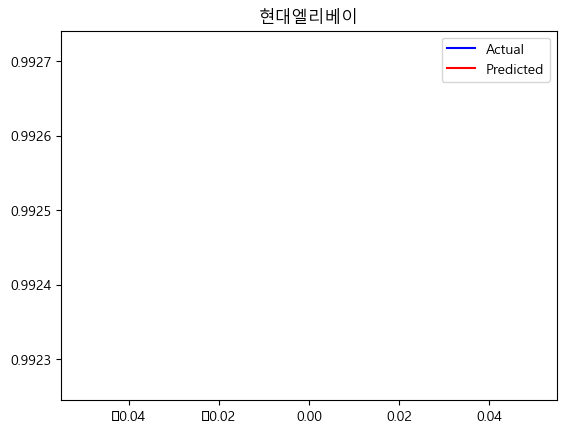

0


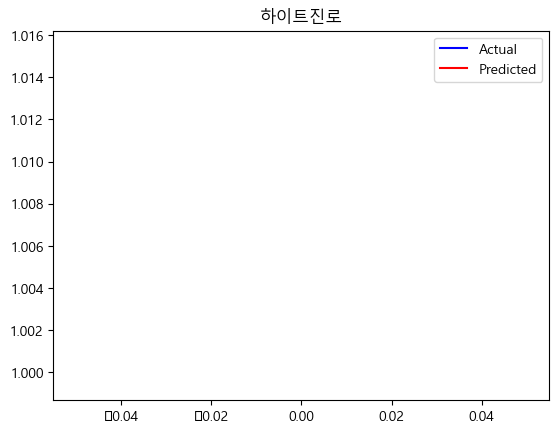

1


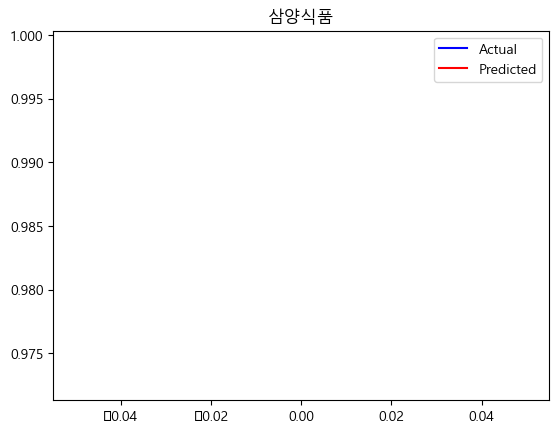

0


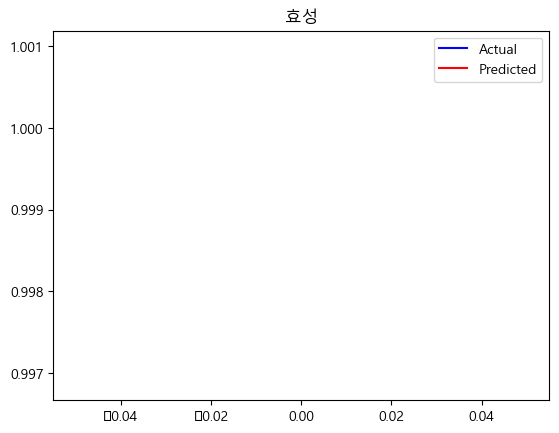

0


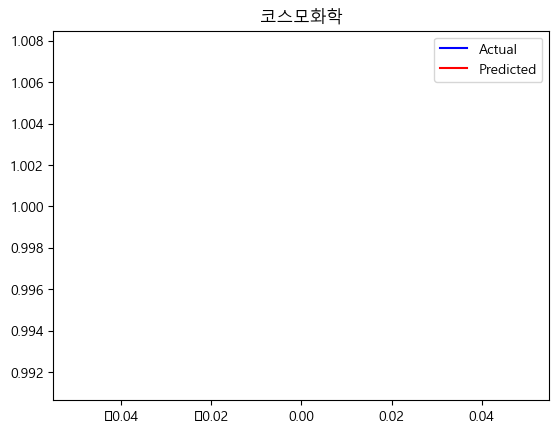

1


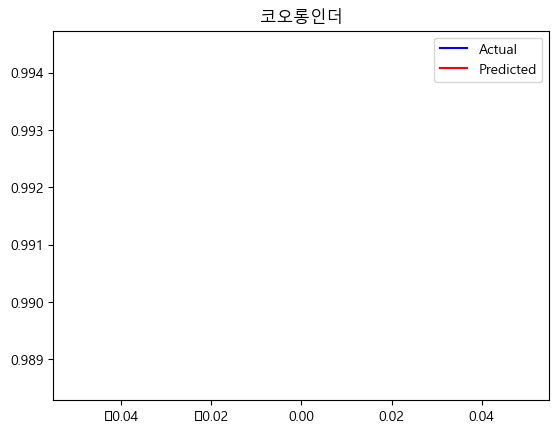

0


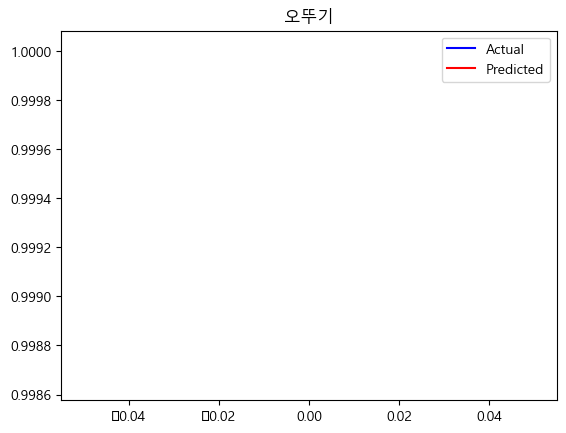

0


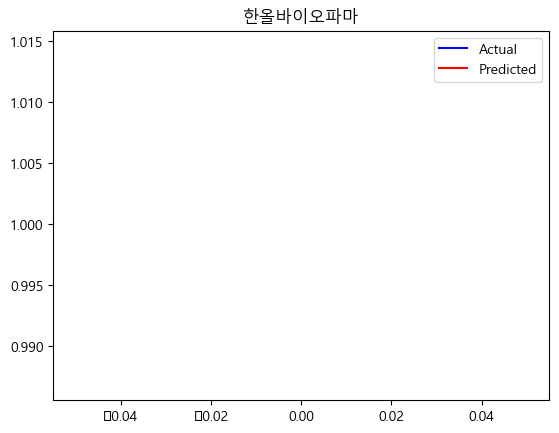

1


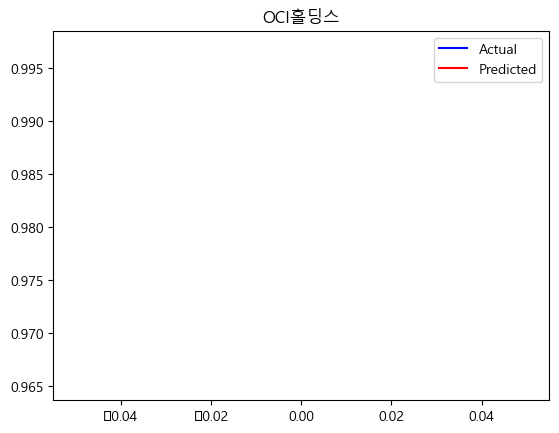

0


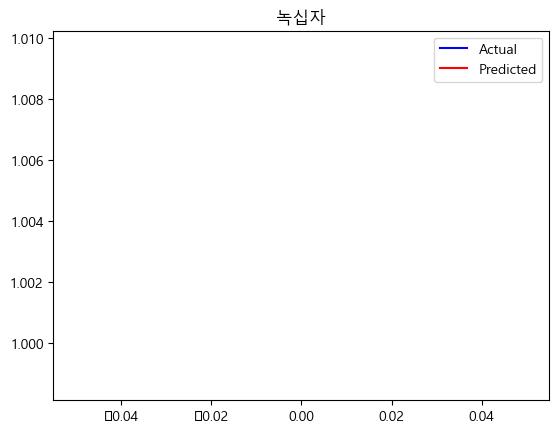

0


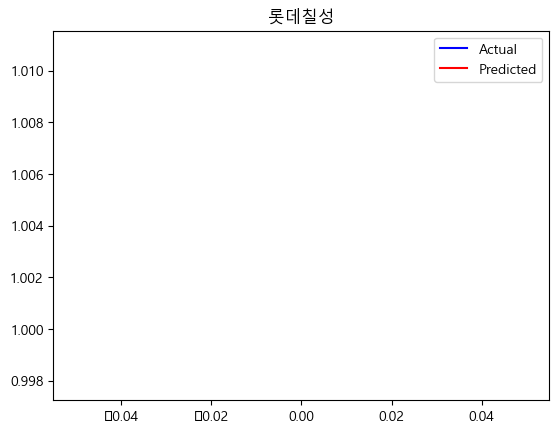

0


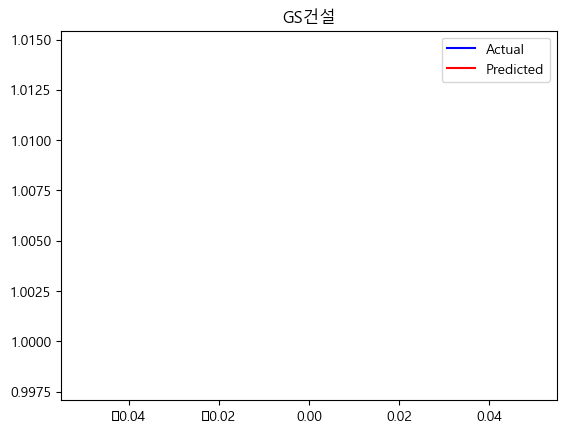

0


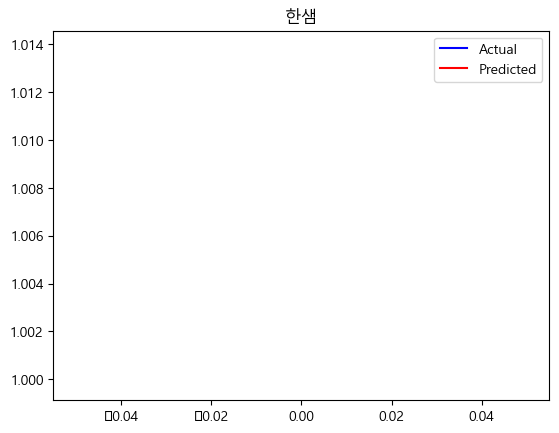

0


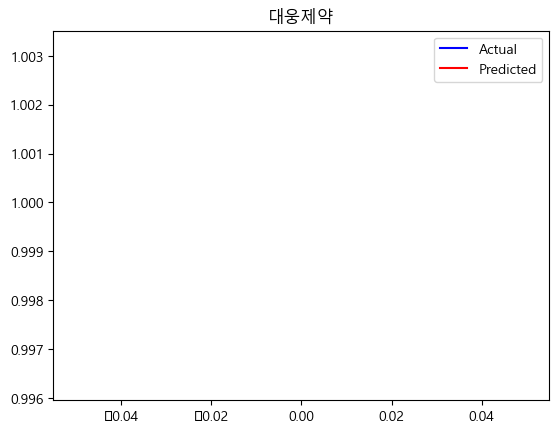

1


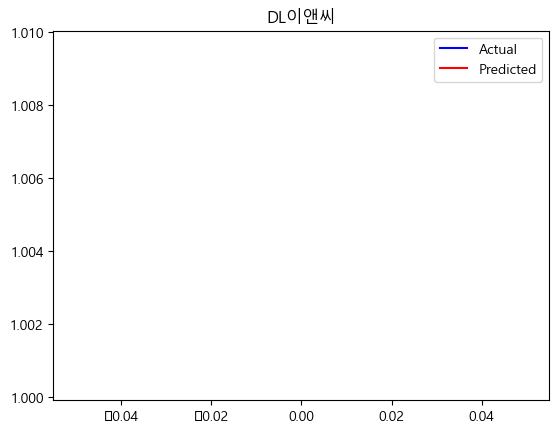

1


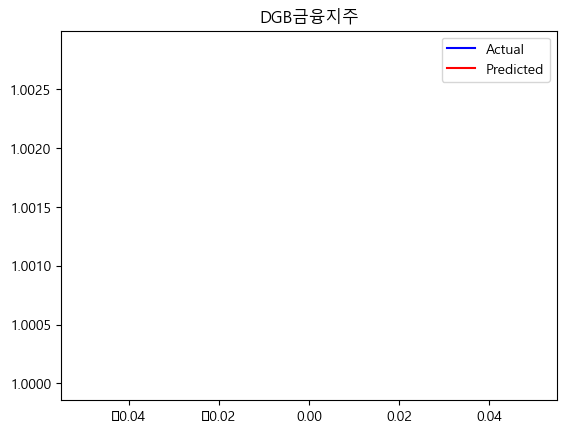

1


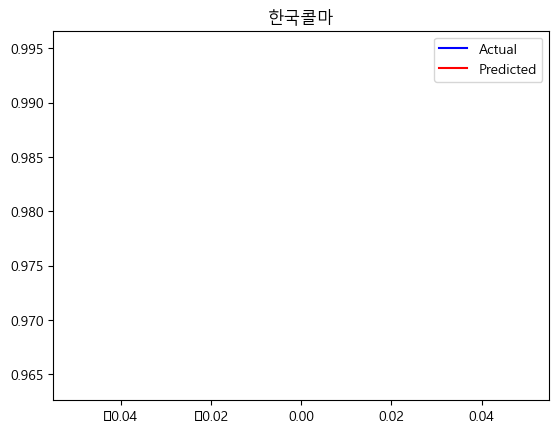

1


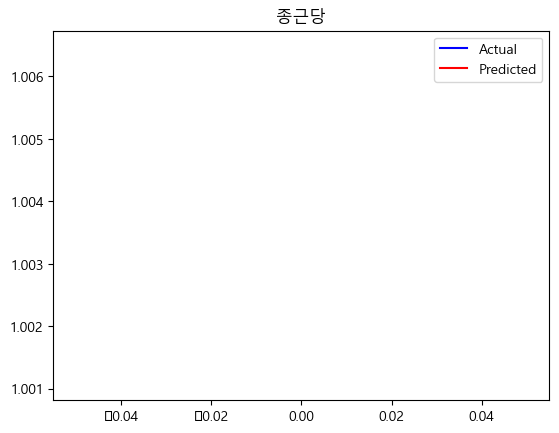

0


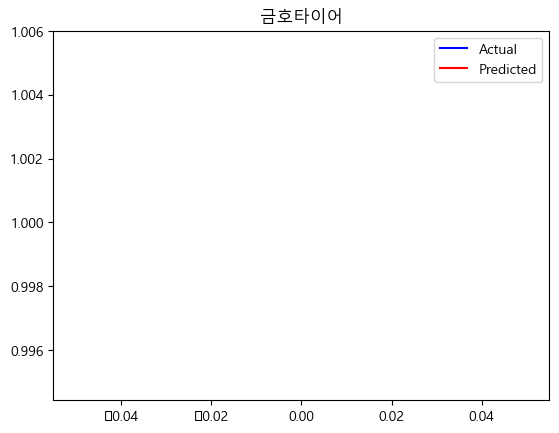

1


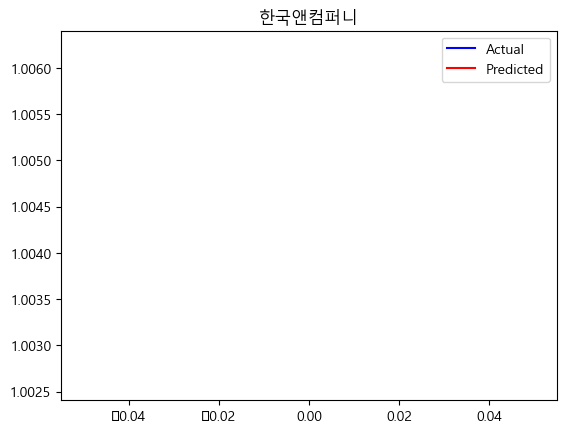

0


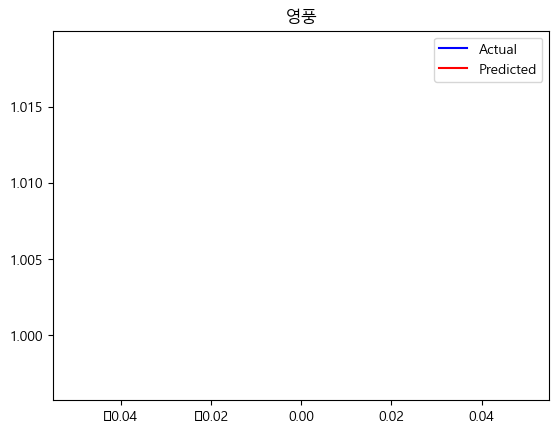

1


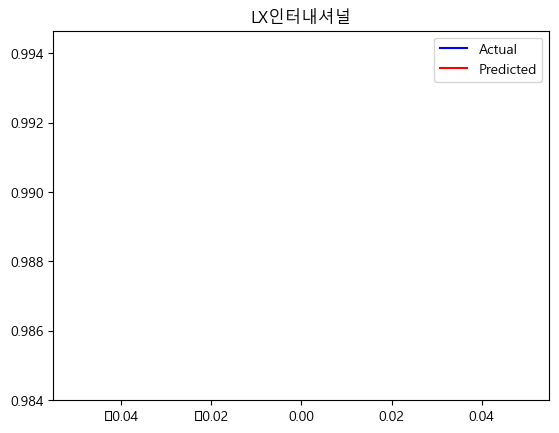

0


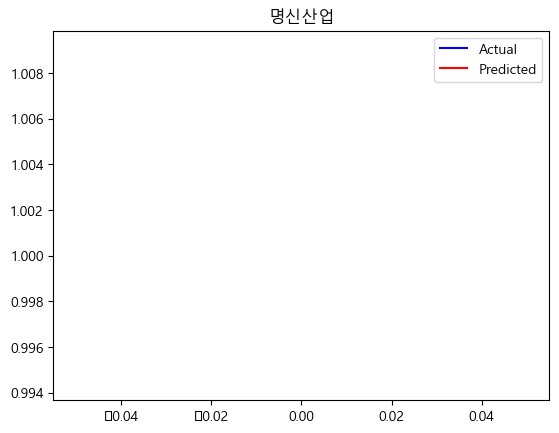

1


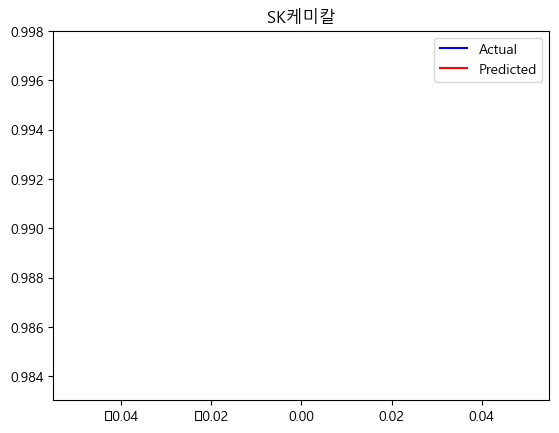

1


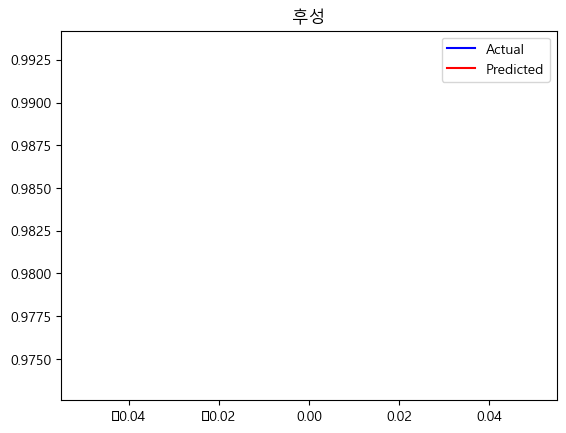

1


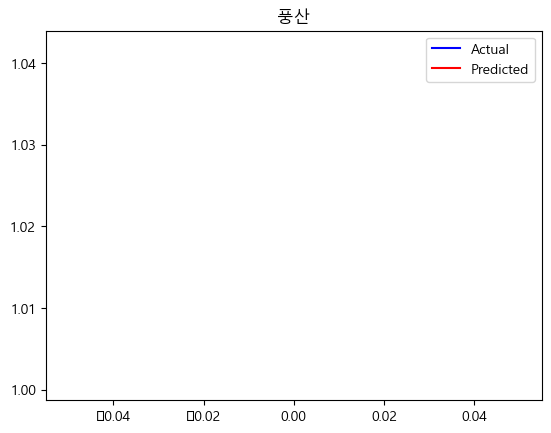

1


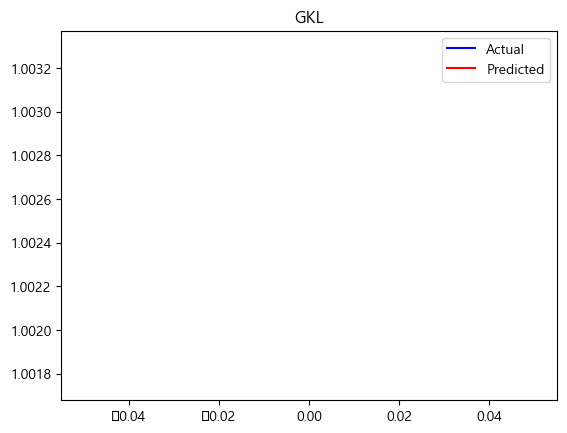

0


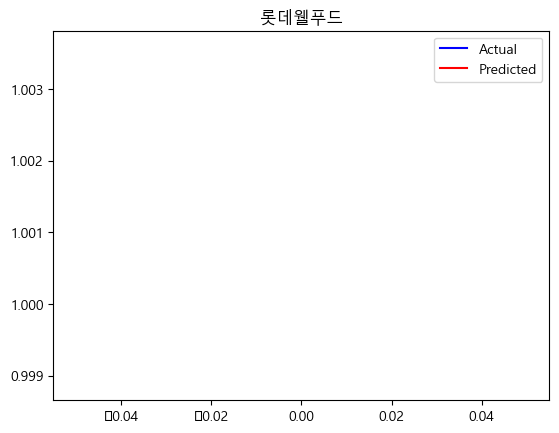

1


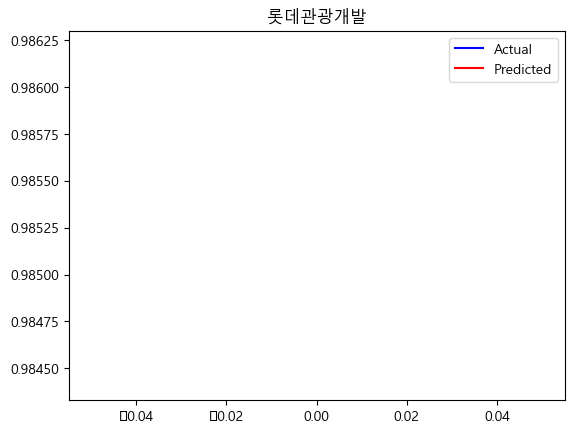

0


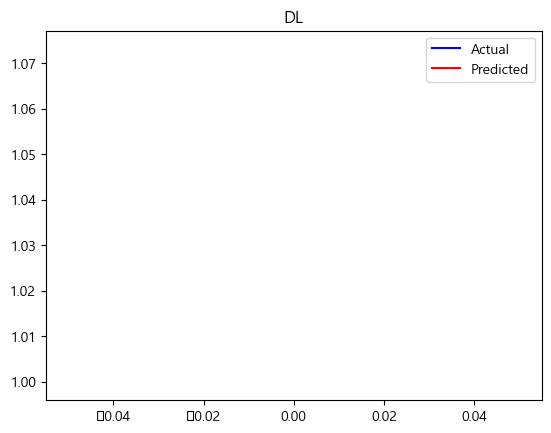

0


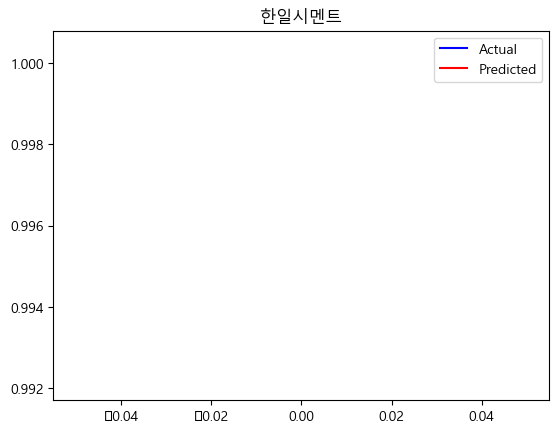

0


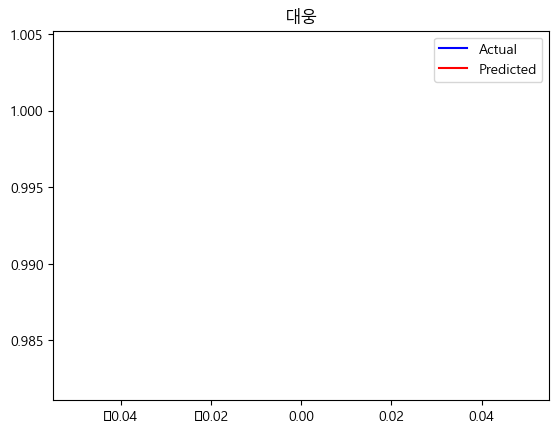

0


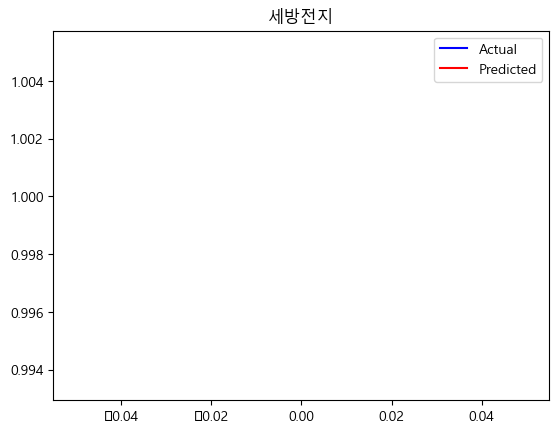

1


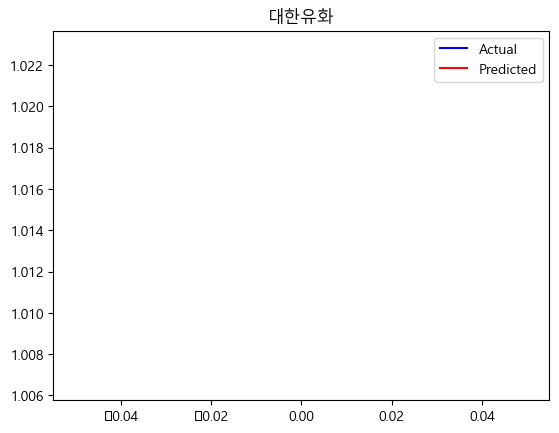

1


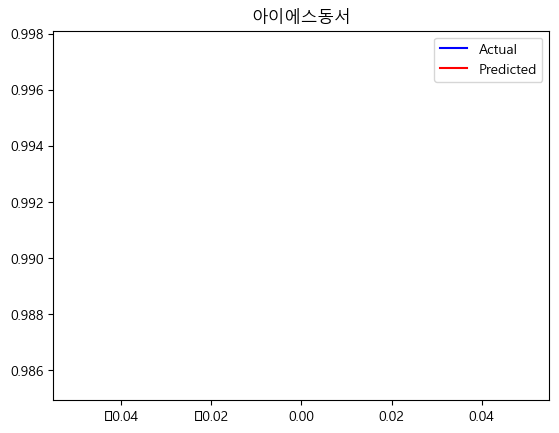

0


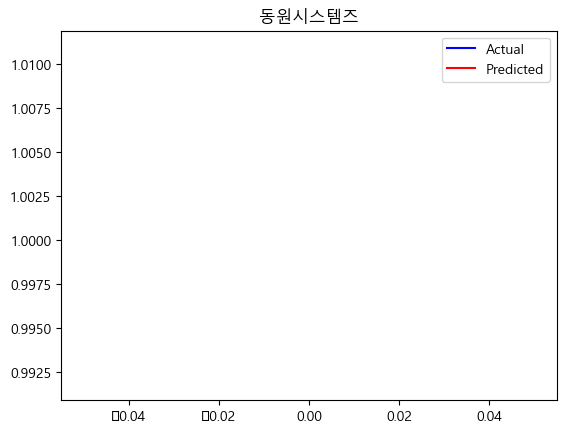

0


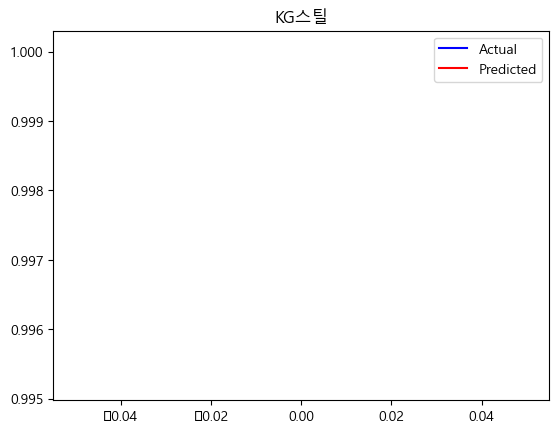

1


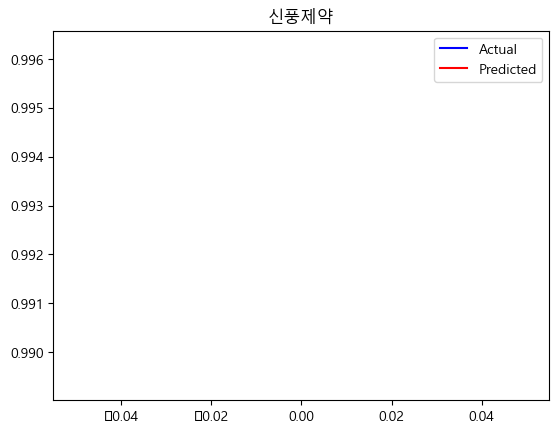

1


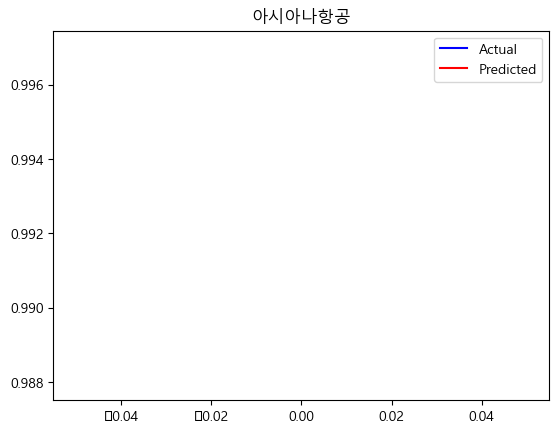

1


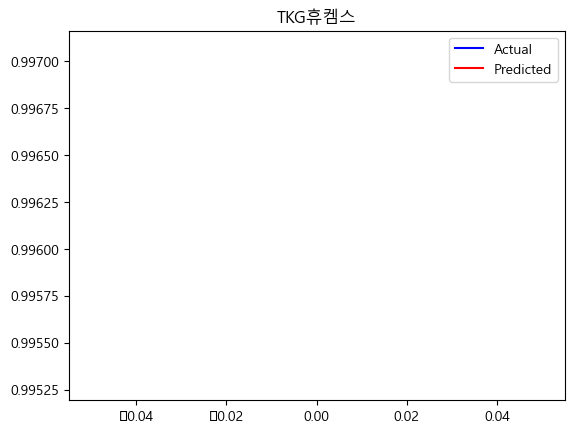

0


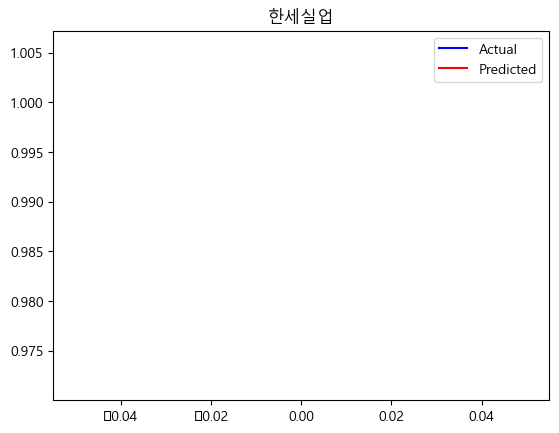

1


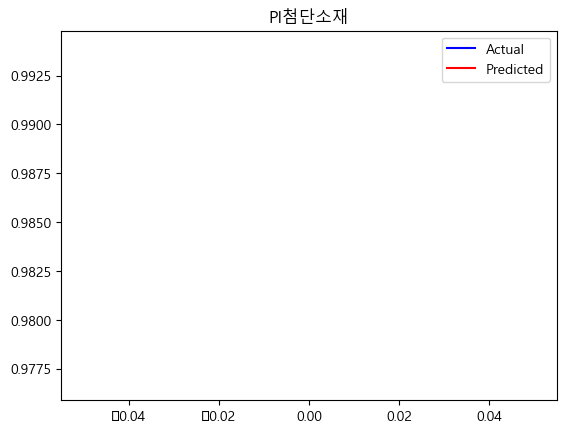

1


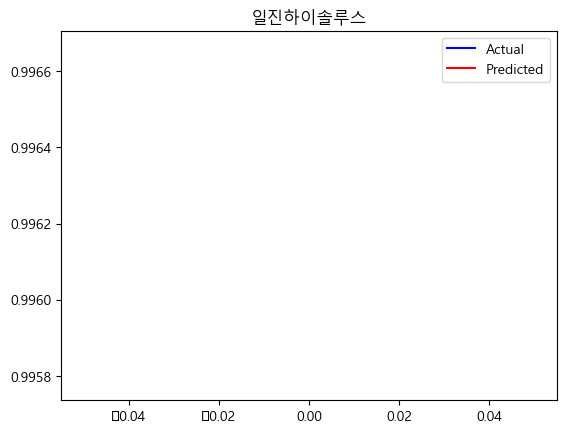

1


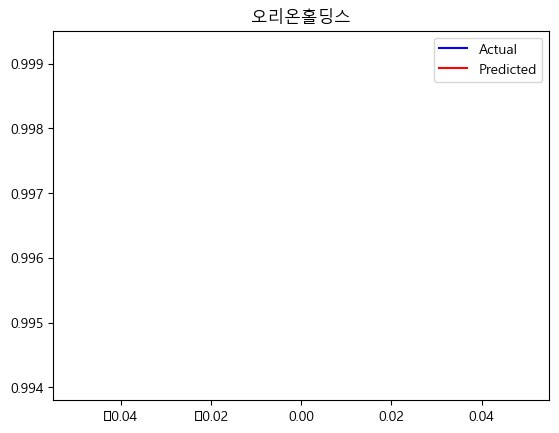

1


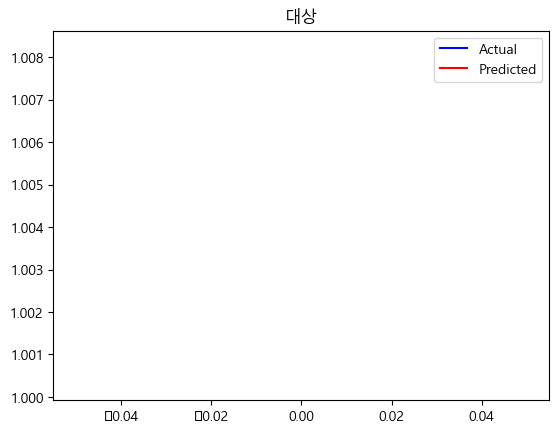

0


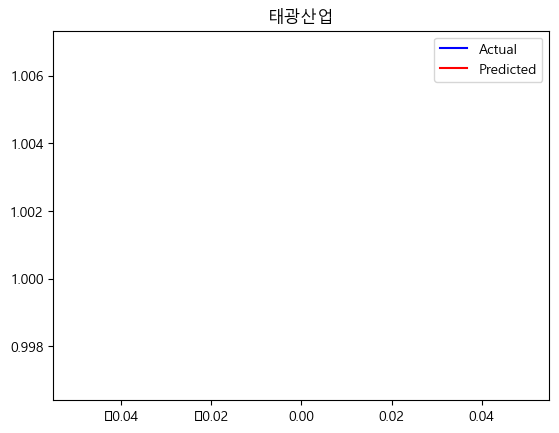

0


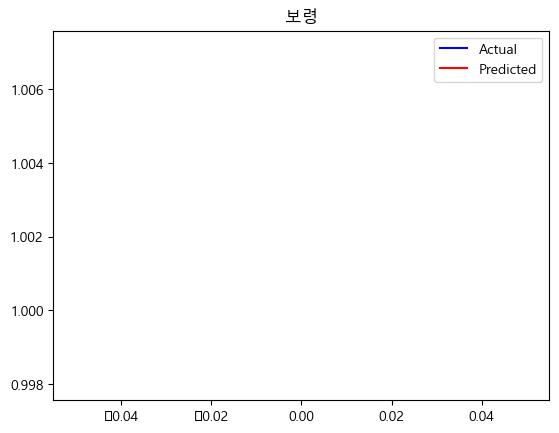

1


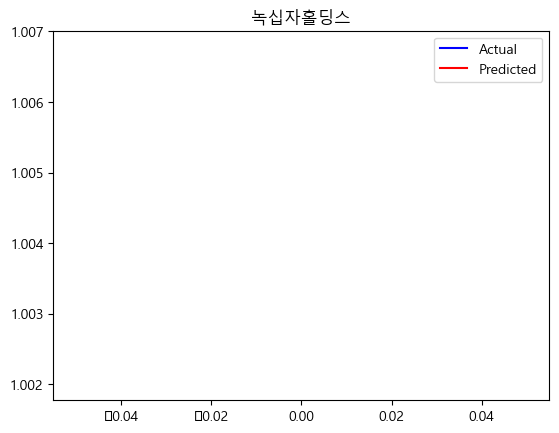

0


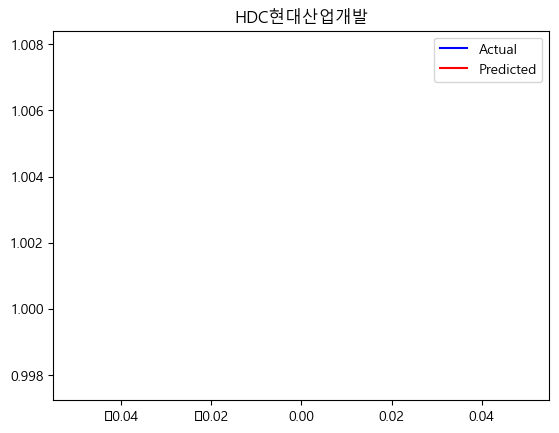

1


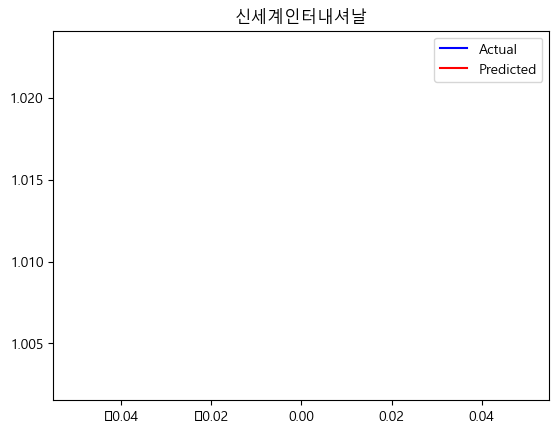

1


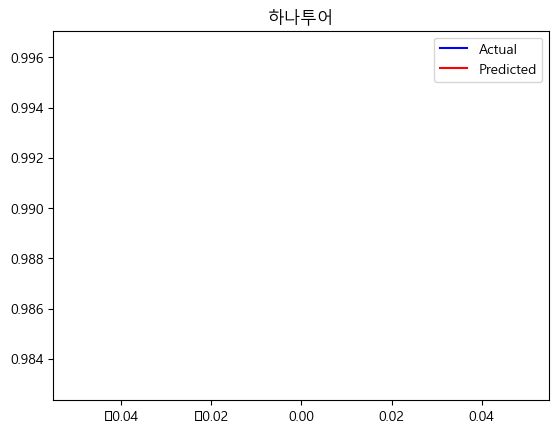

1


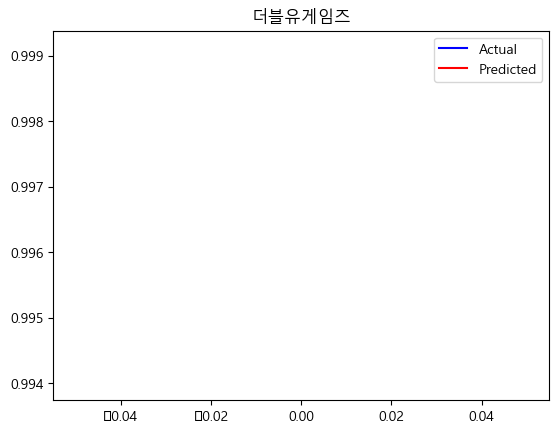

1


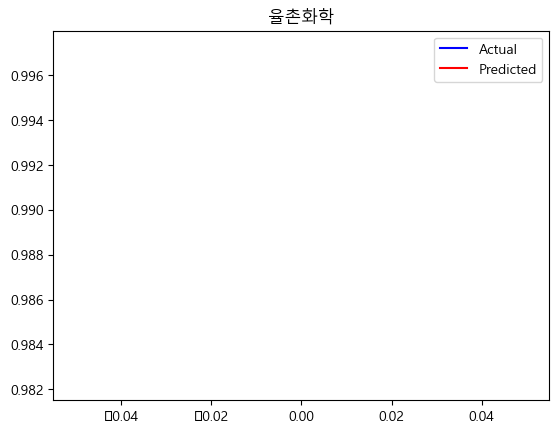

1


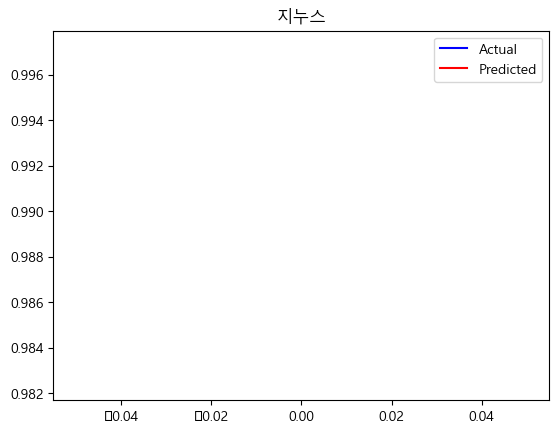

1


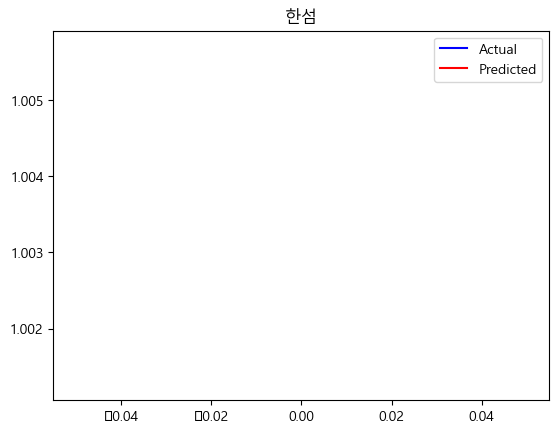

0


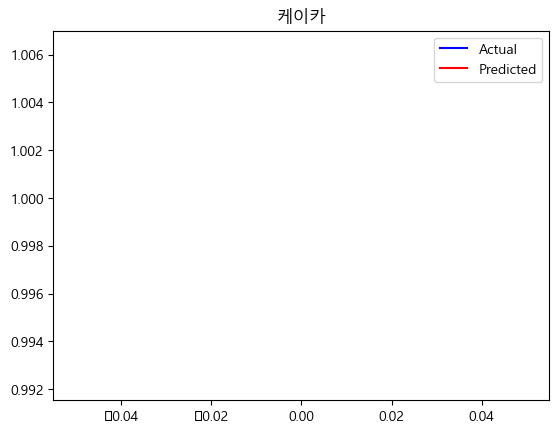

1


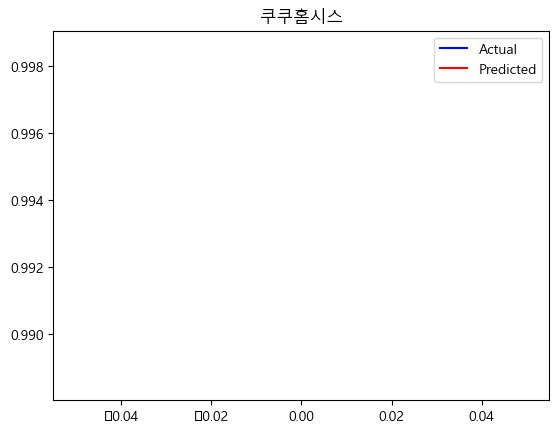

1


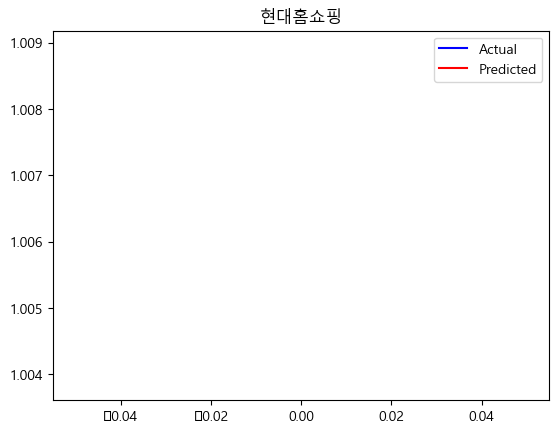

total_acc
0.595


In [ ]:
predicted = model.predict(kospi_10days_data)
print(predicted)
print(kospi_10days_data)
total_acc = 0
for i in range(200):
    acc = 0
    if((kospi_1days_data[i][0] >= 1 and predicted[i][0] >= 1) or (kospi_1days_data[i][0] < 1 and predicted[i][0] < 1)):
        acc += 1
    print(acc)
    # plt.plot(kospi_1days_data[i][0], label = 'Actual', color = 'blue')
    # plt.plot(predicted[i][0], label = 'Predicted', color = 'red')
    # plt.legend()
    # plt.title(name_list[i])
    # plt.show()
    total_acc += acc
print("total_acc")
print(total_acc / 200)